<a href="https://colab.research.google.com/github/Anacatlisboa23/Application-of-Machine-Learning-Methodologies-in-the-Search-for-New-Peptides-with-Antimicrobial-Pote/blob/main/MIC_values_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIC Prediction

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import csv
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import mutual_info_regression

In [ ]:
data

In [ ]:
data['Gram'] = data['Gram'].replace({'Gram-positivo': 1, 'Gram-negativo': 0})

/tmp/ipykernel_3686015/2243273711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gram'] = data['Gram'].replace({'Gram-positivo': 1, 'Gram-negativo': 0})


# Graphs to analyse the dataset:

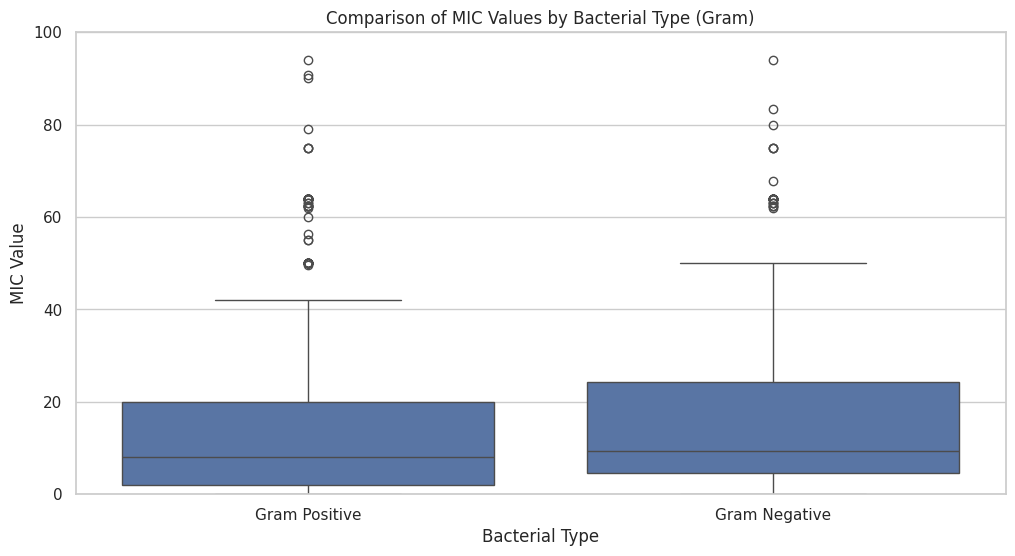

In [ ]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Gram', y='MIC_processado', order=[0, 1])
plt.title('Comparison of MIC Values by Bacterial Type (Gram)')
plt.xlabel('Bacterial Type')
plt.ylabel('MIC Value')

plt.xticks(ticks=[1, 0], labels=['Gram Negative', 'Gram Positive'])
plt.ylim(0, 100)
plt.show()

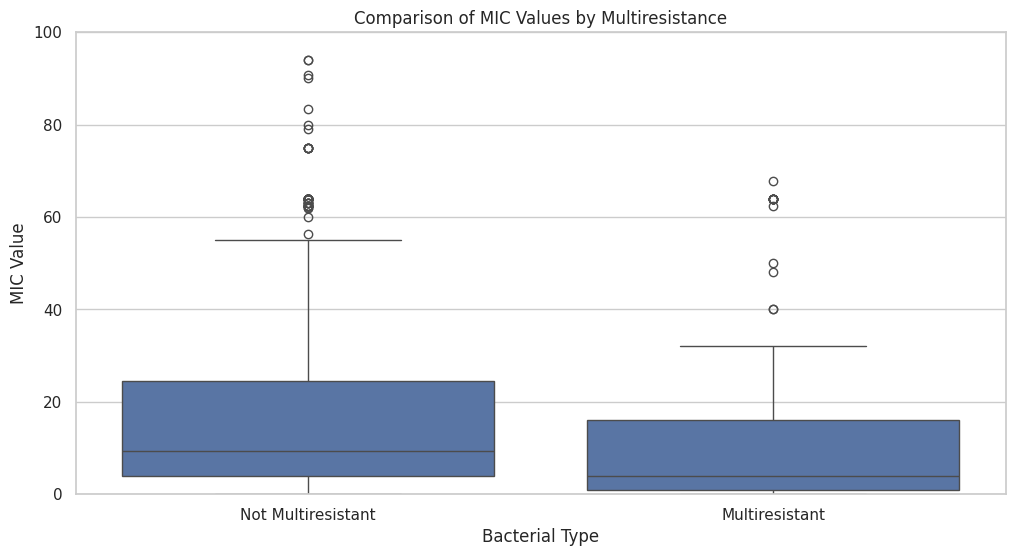

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='multiresistant', y='MIC_processado', order=[0, 1])
plt.title('Comparison of MIC Values by Multiresistance')
plt.xlabel('Bacterial Type')
plt.ylabel('MIC Value')


plt.xticks(ticks=[0, 1], labels=['Not Multiresistant', 'Multiresistant'])


plt.ylim(0, 100)
plt.show()

In [ ]:



def map_eskape(target):
    if 'Enterococcus faecium' in target:
        return 0
    elif 'Staphylococcus aureus' in target:
        return 1
    elif 'Klebsiella pneumoniae' in target:
        return 2
    elif 'Acinetobacter baumannii' in target:
        return 3
    elif 'Pseudomonas aeruginosa' in target:
        return 4
    elif 'Enterobacter' in target:
        return 5
    else:
        return None


data['Target_Organism'] = data['Target_Organism'].apply(map_eskape)



      Unnamed: 0                                           Sequence  \
0              0            TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA   
1              1              TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT   
2              2              TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT   
3              3              TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT   
4              4  NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...   
...          ...                                                ...   
1368        1493                     QLEARFEPKQRNFRKRELDFEKLFANMPDY   
1369        1494                            GLFVGLAKVAAHNNPAIAEHFQA   
1370        1495                                            AFALKKK   
1371        1496                                            AFALKKK   
1372        1497                                            KKKLAYA   

                                           Name  Target_Organism  \
0              Bacteriocin E50-52 (Preclinical)                1   
1          

In [ ]:
organism_mapping = {
    0: 'Enterococcus faecium',
    1: 'Staphylococcus aureus',
    2: 'Klebsiella pneumoniae',
    3: 'Acinetobacter baumannii',
    4: 'Pseudomonas aeruginosa',
    5: 'Enterobacter',
}

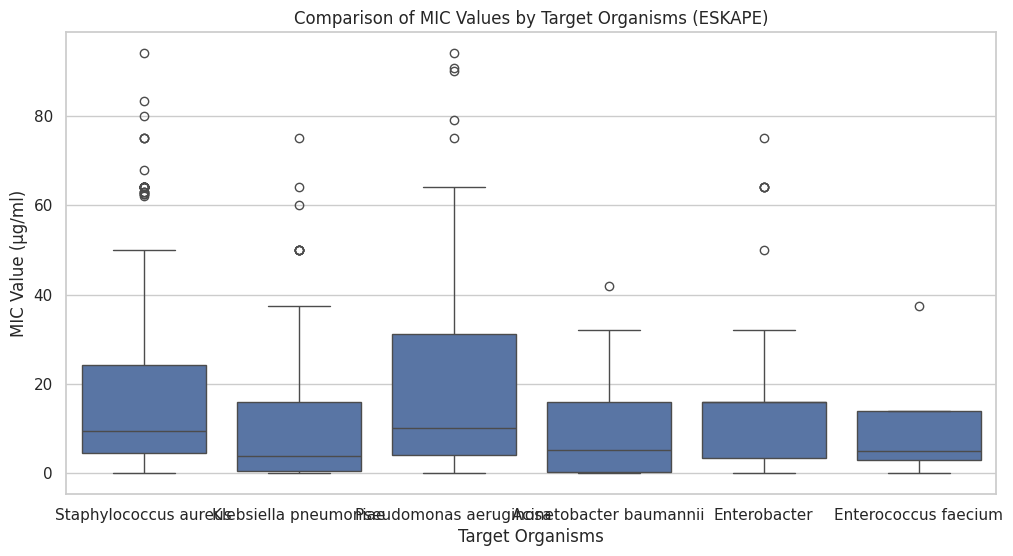

In [ ]:

data['Target_Organism'] = data['Target_Organism'].map(organism_mapping)


plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Target_Organism', y='MIC_processado')
plt.title('Comparison of MIC Values by Target Organisms (ESKAPE)')
plt.xlabel('Target Organisms')
plt.ylabel('MIC Value (µg/ml)')

plt.show()

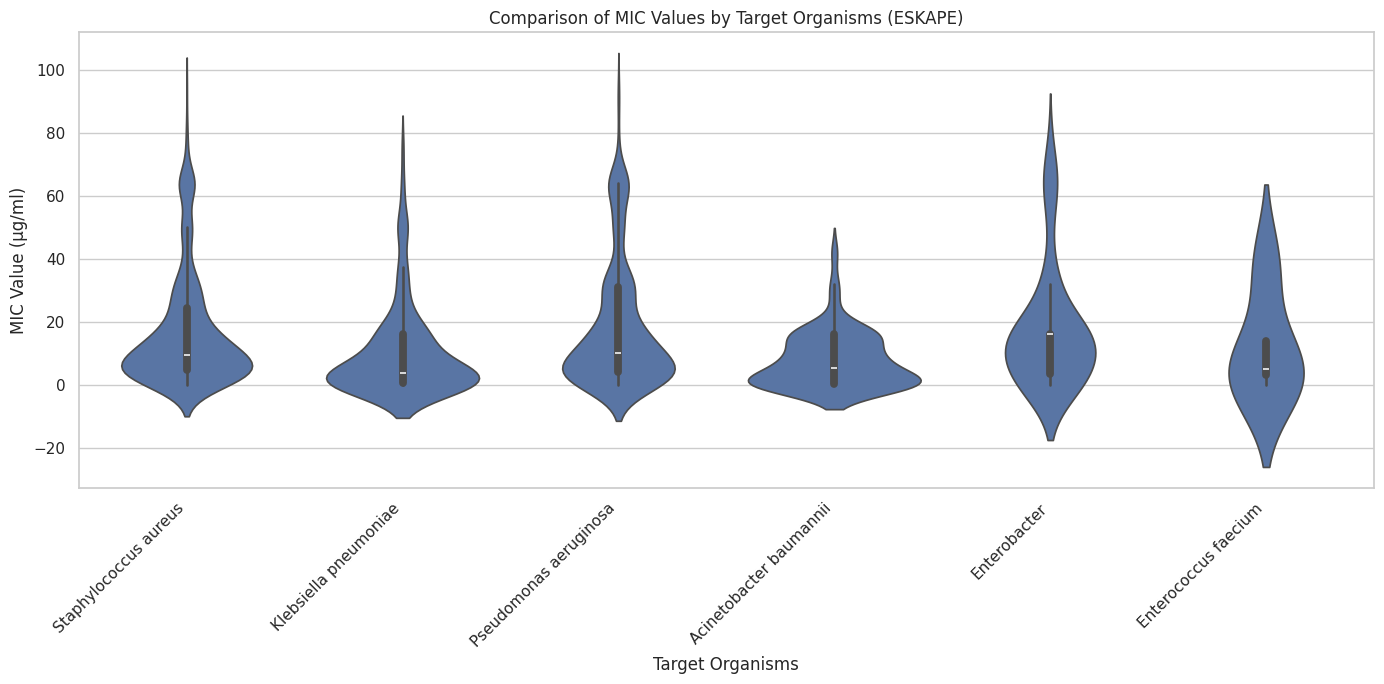

In [ ]:

plt.figure(figsize=(14, 7))
sns.violinplot(data=data, x='Target_Organism', y='MIC_processado')
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of MIC Values by Target Organisms (ESKAPE)')
plt.xlabel('Target Organisms')
plt.ylabel('MIC Value (µg/ml)')
plt.tight_layout()
plt.show()


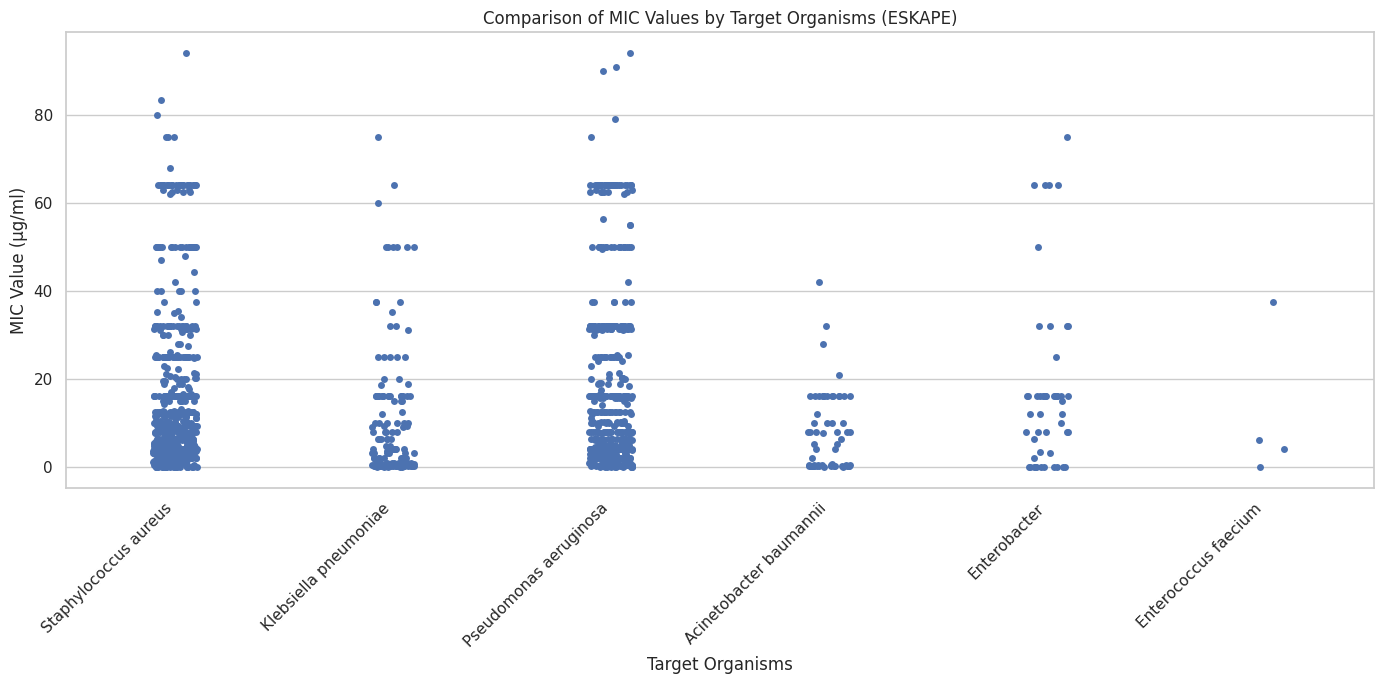

In [ ]:

plt.figure(figsize=(14, 7))
sns.stripplot(data=data, x='Target_Organism', y='MIC_processado', jitter=True)
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of MIC Values by Target Organisms (ESKAPE)')
plt.xlabel('Target Organisms')
plt.ylabel('MIC Value (µg/ml)')
plt.tight_layout()
plt.show()


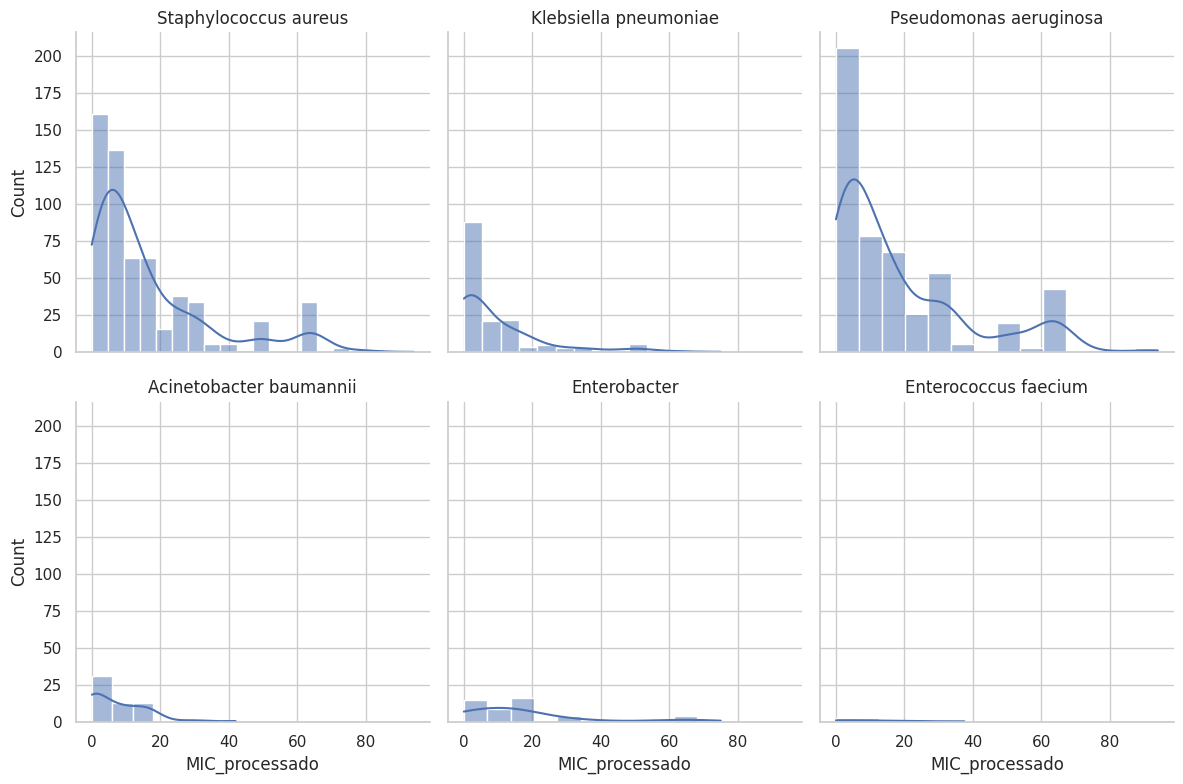

In [ ]:
g = sns.FacetGrid(data, col='Target_Organism', col_wrap=3, height=4)
g.map(sns.histplot, 'MIC_processado', kde=True)
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()


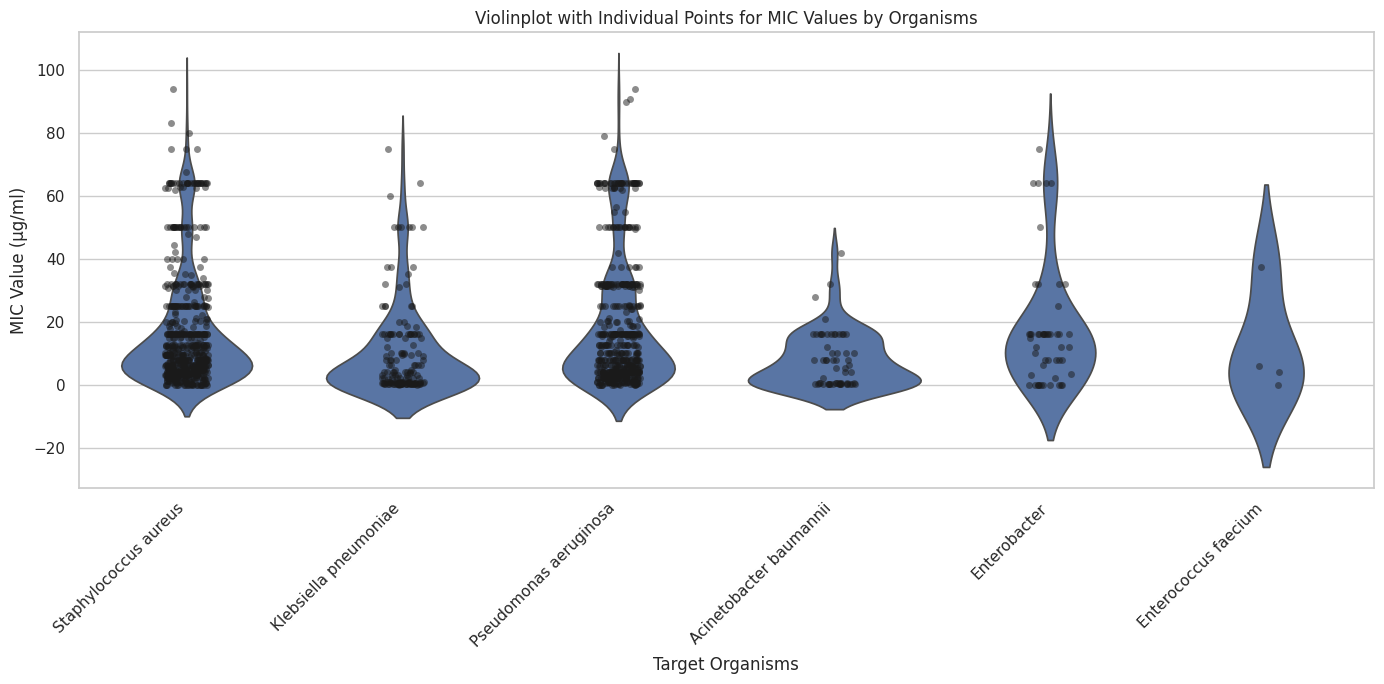

In [ ]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=data, x='Target_Organism', y='MIC_processado', inner=None)
sns.stripplot(data=data, x='Target_Organism', y='MIC_processado', color='k', jitter=True, alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.title('Violinplot with Individual Points for MIC Values by Organisms')
plt.xlabel('Target Organisms')
plt.ylabel('MIC Value (µg/ml)')
plt.tight_layout()
plt.show()

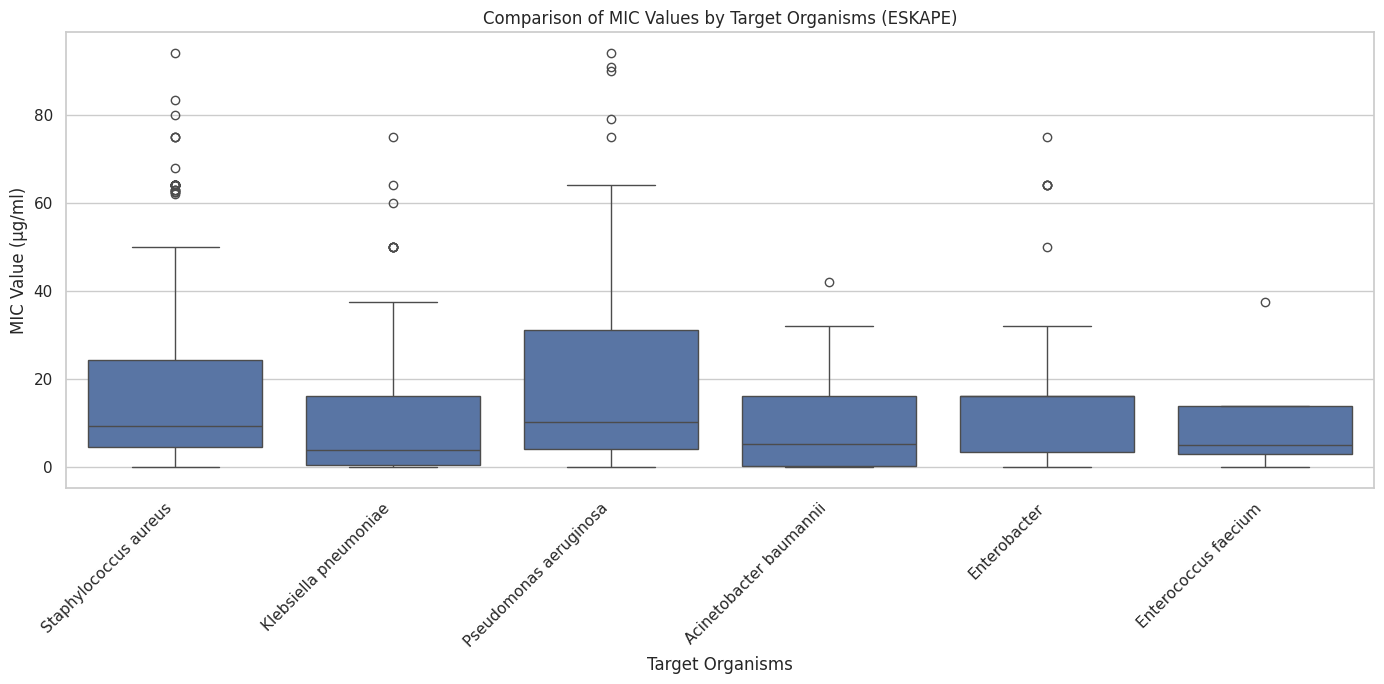

In [ ]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=data, x='Target_Organism', y='MIC_processado')
plt.title('Comparison of MIC Values by Target Organisms (ESKAPE)')
plt.xlabel('Target Organisms')
plt.ylabel('MIC Value (µg/ml)')


plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()


Function for extracting and processing the MIC

In [ ]:

def extrair_mic(mic_str):
    # Remove brackets and inverted commas
    mic_str = mic_str.strip("[]").strip("'")

    # Check for a range with ‘-’
    if '-' in mic_str:
        # Extracts the two values from the range and calculates the average
        valores = re.findall(r'\d+\.?\d*', mic_str)
        media = sum(map(float, valores)) / len(valores)
        return media
    else:
        # Extracts the unique value
        valor = re.search(r'\d+\.?\d*', mic_str)
        return float(valor.group()) if valor else None

# Applies the function to the MIC column
data['MIC_Values'] = data['MIC_Values'].apply(extrair_mic)

In [ ]:
data

,Sequence,Name,Target_Organism,MIC_Values,Gram,multiresistant
0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,0.50,Gram-positivo,0
1,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Klebsiella pneumoniae,0.76,Gram-negativo,0
2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Pseudomonas aeruginosa 508,0.38,Gram-negativo,0
3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,0.76,Gram-positivo,0
4,NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...,Enterocin E-760 (Bacteriocin),Klebsiella pneumoniae,3.20,Gram-negativo,0
...,...,...,...,...,...,...
7392,NLLGSLLKTGLKVGSNLL,Pxt‐12(CPF-St7),Staphylococcus aureus ATCC 25923,32.00,Gram-positivo,0
7393,KLLNLLPGLLAGIF,Reverse Pxt‐5,Pseudomonas aeruginosa NBRC 12582,50.00,Gram-negativo,0
7394,KLLNLLPGLLAGIF,Reverse Pxt‐5,Staphylococcus aureus NBRC 12732,12.50,Gram-positivo,0
7395,ALLKLAPRLLAGIF,Reverse Pxt-2,Pseudomonas aeruginosa NBRC 12582,50.00,Gram-negativo,0


In [ ]:
#Scatter Plot of the Features with the Highest Correlation with MIC
X = df.drop(columns=['MIC_boxcox',"MIC_padronizado"])
mic = df['MIC_boxcox']


df = pd.DataFrame(X)
df['MIC_boxcox'] = mic


correlation_matrix = df.corr()


top_features = correlation_matrix['MIC_boxcox'].sort_values(ascending=False).head(6).index


sns.scatterplot(x=df[top_features[1]], y=df[top_features[2]], hue=df['MIC_boxcox'], palette='coolwarm')


plt.title('Scatter Plot das Features com Maior Correlação com MIC')
plt.xlabel(top_features[1])
plt.ylabel(top_features[2])
plt.show()


In [ ]:
# Fit RandomForest to get feature importances
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance and select the top 10
top_10_rf = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_rf)
plt.title('Top 10 Features Based on Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Use the Lasso to select characteristics
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso.fit(X, y)


lasso_coefficients = pd.Series(lasso.named_steps['lasso'].coef_, index=X.columns)
lasso_importance = lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)

# Select the top 10 features
top_10_lasso = lasso_importance.head(10)

# Plot Lasso coefficients for the top 10 features
plt.figure(figsize=(10, 6))
top_10_lasso.plot(kind='barh')
plt.title('Top 10 Features Based on Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()


In [ ]:
# Calculate Mutual Information
X = df.drop(columns=['MIC_boxcox', 'MIC_padronizado'])  # Remove the target columns
y = df['MIC_boxcox']
mi = mutual_info_regression(X, y)

# Create DataFrame for Mutual Information
mi_feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_feature_importance = mi_feature_importance.sort_values(by='Mutual Information', ascending=False)

# Select the top 10 features
top_10_mi = mi_feature_importance.head(10)

# Plot Mutual Information scores for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=top_10_mi)
plt.title('Top 10 Features Based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

# Dataset Construction:

In [ ]:
# Function to convert values to μg/ml based on the unit
def converter_valor(valor, unidade):

    conversoes = {
        'μg/ml': 1,
        'µg/ml': 1,
        'ug/ml': 1,
        'ng/ml': 1e-3,
        'nm': 1e-6,
        'μm': 1e-6,
        'µm': 1e-6,
        'mm': 1e-3,
        'g/l': 1e3,
        'mg/ml': 1e3
    }

    #  Check if the unit is in the conversion dictionary
    fator_conversao = conversoes.get(unidade.lower(), None)

    if fator_conversao is None:
        raise ValueError(f"Unidade desconhecida: {unidade}")

    #  Convert value to μg/ml
    return valor * fator_conversao

# Function for extracting and processing the MIC
def extrair_e_converter_mic(mic_str):
    # Remove brackets and inverted commas
    mic_str = mic_str.strip("[]").strip("'")

    # Identifies the unit in the text
    unidade = None
    for u in ['μg/ml', 'µg/ml', 'ug/ml', 'ng/ml', 'nm', 'μm', 'µm', 'mm', 'g/l', 'mg/ml']:
        if u in mic_str:
            unidade = u
            break

    if unidade is None:
        return None  # Ignore if the unit is not found in the dictionary

    # Check for a range with ‘-’
    if '-' in mic_str:
        # Extracts the two values from the range and calculates the average
        valores = re.findall(r'\d+\.?\d*', mic_str)
        valores_convertidos = [converter_valor(float(v), unidade) for v in valores]
        media = sum(valores_convertidos) / len(valores)
        return media
    else:
        # Extracts the unique value
        valor = re.search(r'\d+\.?\d*', mic_str)
        if valor:
            valor_convertido = converter_valor(float(valor.group()), unidade)
            return valor_convertido
        else:
            return None

# Applies the function to the MIC column, ignoring unknown unit errors
def safe_apply(x):
    try:
        return extrair_e_converter_mic(x)
    except ValueError as e:
        print(e)  # Just register the error and continue
        return None

data['MIC_processado'] = data['MIC_Values'].apply(safe_apply)


In [ ]:
data

,Sequence,Name,Target_Organism,MIC_Values,Gram,multiresistant,MIC_processado
0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,['0.2-0.8 µg/ml'],Gram-positivo,0,0.50
1,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Klebsiella pneumoniae,['0.76 ug/ml'],Gram-negativo,0,0.76
2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Pseudomonas aeruginosa 508,['0.38 ug/ml'],Gram-negativo,0,0.38
3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,['0.76 ug/ml'],Gram-positivo,0,0.76
4,NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...,Enterocin E-760 (Bacteriocin),Klebsiella pneumoniae,['3.2 μg/ml'],Gram-negativo,0,3.20
...,...,...,...,...,...,...,...
7392,NLLGSLLKTGLKVGSNLL,Pxt‐12(CPF-St7),Staphylococcus aureus ATCC 25923,['32 µM'],Gram-positivo,0,NaN
7393,KLLNLLPGLLAGIF,Reverse Pxt‐5,Pseudomonas aeruginosa NBRC 12582,['50 µM'],Gram-negativo,0,NaN
7394,KLLNLLPGLLAGIF,Reverse Pxt‐5,Staphylococcus aureus NBRC 12732,['12.5 µM'],Gram-positivo,0,NaN
7395,ALLKLAPRLLAGIF,Reverse Pxt-2,Pseudomonas aeruginosa NBRC 12582,['50 µM'],Gram-negativo,0,NaN


In [ ]:
data_filtrado = data.dropna(subset=['MIC_processado'])

In [ ]:
data_filtrado

,Sequence,Name,Target_Organism,MIC_Values,Gram,multiresistant,MIC_processado
0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,['0.2-0.8 µg/ml'],Gram-positivo,0,0.50
1,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Klebsiella pneumoniae,['0.76 ug/ml'],Gram-negativo,0,0.76
2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Pseudomonas aeruginosa 508,['0.38 ug/ml'],Gram-negativo,0,0.38
3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,['0.76 ug/ml'],Gram-positivo,0,0.76
4,NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...,Enterocin E-760 (Bacteriocin),Klebsiella pneumoniae,['3.2 μg/ml'],Gram-negativo,0,3.20
...,...,...,...,...,...,...,...
7295,KFFKRLLKSVRRAVKKFRKKPRLIGLSTLL,Hc-CATH,Enterococcus faecium,['37.50 µg/ml'],Gram-positivo,0,37.50
7296,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Staphylococcus aureus ATCC 6538,['14.18 µg/ml'],Gram-positivo,0,14.18
7297,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Pseudomonas aeruginosa ATCC 9027,['14.18 µg/ml'],Gram-negativo,0,14.18
7298,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae ATCC 35657,['9.88 µg/ml'],Gram-negativo,0,9.88


ficamos com 3006

In [ ]:
valores_unicos_gram = data['multiresistant'].unique()
print("Valores únicos na coluna 'multiresistant':", valores_unicos_gram)

Valores únicos na coluna 'multiresistant': [0 1]


In [ ]:
data

,Sequence,Name,Target_Organism,MIC_Values,Gram,multiresistant,MIC_processado
0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,['0.2-0.8 µg/ml'],Gram-positivo,0,0.50
1,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Klebsiella pneumoniae,['0.76 ug/ml'],Gram-negativo,0,0.76
2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Pseudomonas aeruginosa 508,['0.38 ug/ml'],Gram-negativo,0,0.38
3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,['0.76 ug/ml'],Gram-positivo,0,0.76
4,NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...,Enterocin E-760 (Bacteriocin),Klebsiella pneumoniae,['3.2 μg/ml'],Gram-negativo,0,3.20
...,...,...,...,...,...,...,...
3001,KFFKRLLKSVRRAVKKFRKKPRLIGLSTLL,Hc-CATH,Enterococcus faecium,['37.50 µg/ml'],Gram-positivo,0,37.50
3002,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Staphylococcus aureus ATCC 6538,['14.18 µg/ml'],Gram-positivo,0,14.18
3003,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Pseudomonas aeruginosa ATCC 9027,['14.18 µg/ml'],Gram-negativo,0,14.18
3004,KWKLFKKIHKVGQNIRKGIIKAGPAVAVVGQAAQIAK,PEW300,Klebsiella pneumoniae ATCC 35657,['9.88 µg/ml'],Gram-negativo,0,9.88


In [ ]:
contagem_1 = data['multiresistant'].sum()
print("Número de ocorrências de '1' na coluna 'multiresistant':", contagem_1)
#282 multiresistant

Número de ocorrências de '1' na coluna 'multiresistant': 281


Save dataset:

In [ ]:
df.to_csv("/content/MIC_ESKAPE.csv", index=False)

# Preprocessing


__Outliers__

In [ ]:
data = data.copy()

# Calculate Q1 and Q3 specifically for the ‘MIC_values’ column
Q1 = data['MIC_processado'].quantile(0.25)
Q3 = data['MIC_processado'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Set an adjusted multiplier (e.g. 2.5) to identify outliers
multiplicador = 2.5

# Calculate lower and upper limits
limite_inferior = Q1 - multiplicador * IQR
limite_superior = Q3 + multiplicador * IQR

# Filter the data to eliminate outliers
data = data[(data['MIC_processado'] >= limite_inferior) &
                            (data['MIC_processado'] <= limite_superior)]


print(data)


                                               Sequence  \
0               TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA   
1                 TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT   
2                 TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT   
3                 TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT   
4     NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...   
...                                                 ...   
1493                     QLEARFEPKQRNFRKRELDFEKLFANMPDY   
1494                            GLFVGLAKVAAHNNPAIAEHFQA   
1495                                            AFALKKK   
1496                                            AFALKKK   
1497                                            KKKLAYA   

                                           Name             Target_Organism  \
0              Bacteriocin E50-52 (Preclinical)       Staphylococcus aureus   
1                            Bacteriocin L-1077       Klebsiella pneumoniae   
2                            Bacteriocin L-1077  Pseud

In [ ]:
plt.hist(data_cleaned['MIC_processado'], bins=50)
plt.title('Standardised MIC distribution')
plt.show()


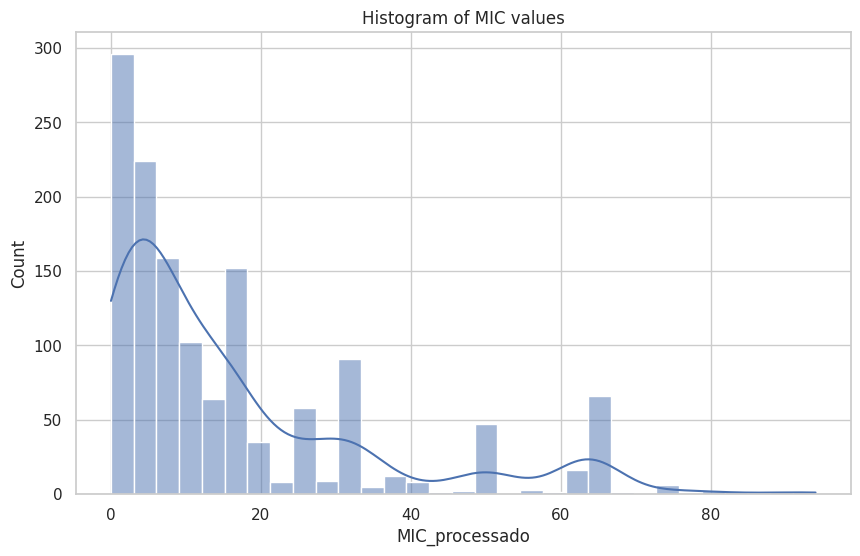

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['MIC_processado'], kde=True)
plt.title('Histogram of MIC values')
plt.show()

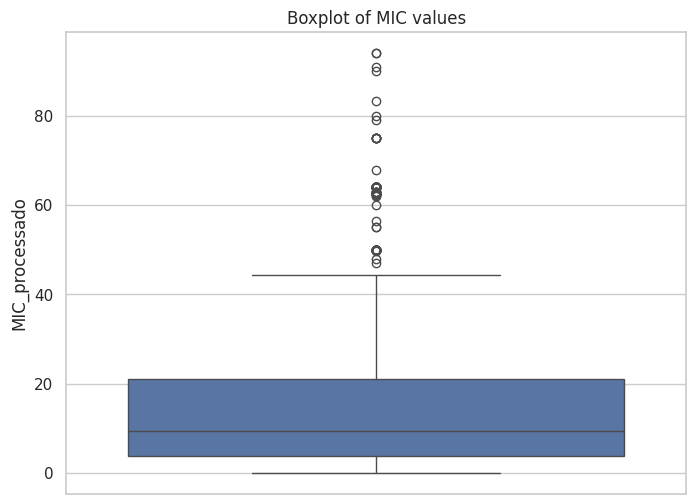

In [ ]:
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data_cleaned['MIC_processado'])
plt.title('Boxplot of MIC values')
plt.show()

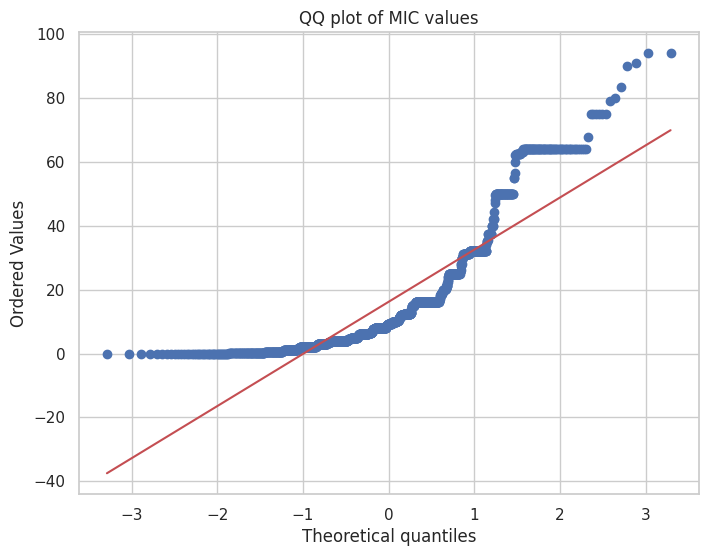

In [ ]:
#  QQ Graph
plt.figure(figsize=(8, 6))
stats.probplot(data_cleaned['MIC_processado'], dist="norm", plot=plt)
plt.title('QQ plot of MIC values')
plt.show()

__Tranformation__

In [ ]:
# Shapiro-Wilk Test
stat, p = stats.shapiro(data['MIC_processado'])
print(f'Teste de Shapiro-Wilk: p-value = {p}')

#p-value = 2.930257524649075e-39

Teste de Shapiro-Wilk: p-value = 2.930257524649075e-39


In [ ]:
from scipy import stats

#box cox transformation

data['MIC_boxcox'], _ = stats.boxcox(data['MIC_processado'] + 1)

In [ ]:
# log transformation
data_cleaned['MIC_log'] = np.log(data_cleaned['MIC_processado'] + 1)

In [ ]:
# Generate the QQ Plot for the transformed data
plt.figure(figsize=(8, 6))
stats.probplot(data_cleaned['MIC_boxcox'], dist="norm", plot=plt)
plt.title('QQ Graph of MIC Values (Box Cox Transformation)')
plt.show()
# Shapiro-Wilk test for transformed data
stat, p = stats.shapiro(data_cleaned['MIC_boxcox'])
print(f'Teste de Shapiro-Wilk após transformação boxcox: p-value = {p}')

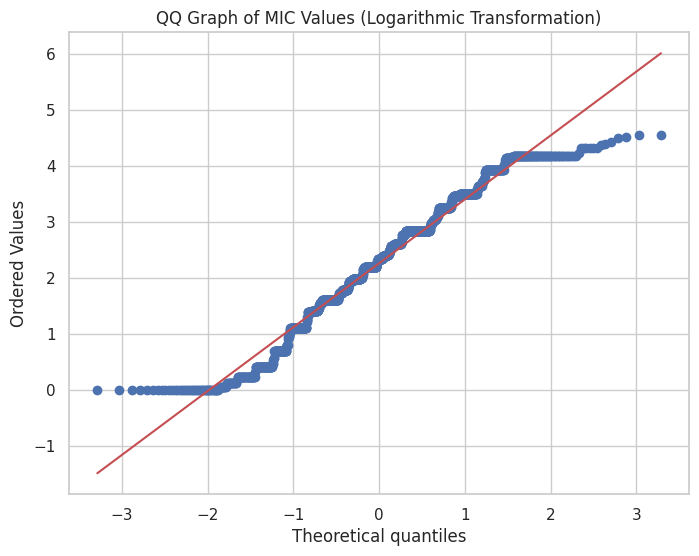

In [ ]:
# Generate the QQ Plot for the transformed data
plt.figure(figsize=(8, 6))
stats.probplot(data_cleaned['MIC_log'], dist="norm", plot=plt)
plt.title('QQ Graph of MIC Values (Logarithmic Transformation)')
plt.show()


In [ ]:
# Shapiro-Wilk test for transformed data
stat, p = stats.shapiro(data_cleaned['MIC_log'])
print(f'Teste de Shapiro-Wilk após transformação logarítmica: p-value = {p}')

#p-value = 9.152880105863016e-16

In [ ]:
#Model Summary

import statsmodels.api as sm

# Adicionar uma constante para o intercepto no conjunto de treinamento padronizado
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Ajustar o modelo de regressão linear com os dados de treinamento padronizados
model = sm.OLS(y_train, X_train_scaled_const)
result = model.fit()

# Resumo do modelo ajustado
print(result.summary())


# Machinne Learning:

In [ ]:
# import
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.datasets import make_regression
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import mutual_info_regression

#Random Forest Regressor:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Gradient Boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

#SVR
from sklearn.svm import SVR

#NN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


# Visualisation settings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import seaborn as sns
import scipy.stats as stats

#Cross Validation
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_validate

#Feature importance
from sklearn.linear_model import Lasso



2024-10-07 17:48:48.330742: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 17:48:48.441217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 17:48:48.481574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-07 17:48:48.487609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-07 17:48:48.532984: I tensorflow/core/platform/cpu_feature_guar

Import dataset:

In [ ]:
data=pd.read_csv("/home/alisboa/feaurescertas_mic (1).csv")

In [ ]:
data

,Unnamed: 0,Sequence,Name,Target_Organism,MIC_Values,Gram,multiresistant,MIC_processado,length,A,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,['0.2-0.8 µg/ml'],Gram-positivo,0,0.50,39.0,12.821,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,2.63,0.0,0.0
1,1,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Klebsiella pneumoniae,['0.76 ug/ml'],Gram-negativo,0,0.76,37.0,8.108,...,0.0,0.0,0.0,0.0,2.78,0.0,0.0,0.00,0.0,0.0
2,2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Pseudomonas aeruginosa 508,['0.38 ug/ml'],Gram-negativo,0,0.38,37.0,8.108,...,0.0,0.0,0.0,0.0,2.78,0.0,0.0,0.00,0.0,0.0
3,3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,['0.76 ug/ml'],Gram-positivo,0,0.76,37.0,8.108,...,0.0,0.0,0.0,0.0,2.78,0.0,0.0,0.00,0.0,0.0
4,4,NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...,Enterocin E-760 (Bacteriocin),Klebsiella pneumoniae,['3.2 μg/ml'],Gram-negativo,0,3.20,62.0,16.129,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1603,QLEARFEPKQRNFRKRELDFEKLFANMPDY,"Imcroporin (Arthropods, animals)",Staphylococcus aureus,['20μg/ml'],Gram-positivo,0,20.00,30.0,6.667,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1494,1604,GLFVGLAKVAAHNNPAIAEHFQA,"Maculatin 1.2 (Frog, amphibians, animals)",Staphylococcus aureus,['50 μg/ml'],Gram-positivo,0,50.00,23.0,26.087,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1495,1605,AFALKKK,peptide 12 (Derived from B1),Pseudomonas aeruginosa,['>64µg/ml'],Gram-negativo,0,64.00,7.0,28.571,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1496,1606,AFALKKK,peptide 13 (Derived from B1),Pseudomonas aeruginosa,['>64µg/ml'],Gram-negativo,0,64.00,7.0,28.571,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0


In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
data

,Sequence,Name,Target_Organism,MIC_Values,Gram,multiresistant,MIC_processado,length,A,R,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,TTKNYGNGVCNSVNWCQCGNVWASCNLATGCAAWLCKLA,Bacteriocin E50-52 (Preclinical),Staphylococcus aureus,['0.2-0.8 µg/ml'],Gram-positivo,0,0.50,39.0,12.821,0.000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,2.63,0.0,0.0
1,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Klebsiella pneumoniae,['0.76 ug/ml'],Gram-negativo,0,0.76,37.0,8.108,2.703,...,0.0,0.0,0.0,0.0,2.78,0.0,0.0,0.00,0.0,0.0
2,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Pseudomonas aeruginosa 508,['0.38 ug/ml'],Gram-negativo,0,0.38,37.0,8.108,2.703,...,0.0,0.0,0.0,0.0,2.78,0.0,0.0,0.00,0.0,0.0
3,TNYGNGVGVPDAIMAGIIKLIFIFNIRQGYNFGKKAT,Bacteriocin L-1077,Staphylococcus aureus,['0.76 ug/ml'],Gram-positivo,0,0.76,37.0,8.108,2.703,...,0.0,0.0,0.0,0.0,2.78,0.0,0.0,0.00,0.0,0.0
4,NRWYCNSAAGGVGGAAVCGLAGYVGEAKENIAGEVRKGWGMAGGFT...,Enterocin E-760 (Bacteriocin),Klebsiella pneumoniae,['3.2 μg/ml'],Gram-negativo,0,3.20,62.0,16.129,3.226,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,QLEARFEPKQRNFRKRELDFEKLFANMPDY,"Imcroporin (Arthropods, animals)",Staphylococcus aureus,['20μg/ml'],Gram-positivo,0,20.00,30.0,6.667,13.333,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1494,GLFVGLAKVAAHNNPAIAEHFQA,"Maculatin 1.2 (Frog, amphibians, animals)",Staphylococcus aureus,['50 μg/ml'],Gram-positivo,0,50.00,23.0,26.087,0.000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1495,AFALKKK,peptide 12 (Derived from B1),Pseudomonas aeruginosa,['>64µg/ml'],Gram-negativo,0,64.00,7.0,28.571,0.000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0
1496,AFALKKK,peptide 13 (Derived from B1),Pseudomonas aeruginosa,['>64µg/ml'],Gram-negativo,0,64.00,7.0,28.571,0.000,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0


In [ ]:
data=pd.read_csv("/home/alisboa/CERTOO_PROTBERT_MIC.csv")

In [ ]:
data=pd.read_csv("/home/alisboa/este_embeddings_MIC_ESM-1b.csv")

In [ ]:
data.columns

Index(['Sequence', 'MIC_processado', 'Gram', 'multiresistant', 'Name',
       'Target_Organism', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6',
       'PC_7', 'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14',
       'PC_15', 'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_20', 'PC_21', 'PC_22',
       'PC_23', 'PC_24', 'PC_25', 'PC_26', 'PC_27', 'PC_28', 'PC_29', 'PC_30',
       'PC_31', 'PC_32', 'PC_33', 'PC_34', 'PC_35', 'PC_36', 'PC_37', 'PC_38',
       'PC_39', 'PC_40', 'PC_41', 'PC_42', 'PC_43', 'PC_44', 'PC_45', 'PC_46',
       'PC_47', 'PC_48', 'PC_49', 'PC_50'],
      dtype='object')

In [ ]:
data['Gram'] = data['Gram'].replace({'Gram-positivo': 1, 'Gram-negativo': 0})

/tmp/ipykernel_2284557/2243273711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gram'] = data['Gram'].replace({'Gram-positivo': 1, 'Gram-negativo': 0})


In [ ]:
data.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
data

,sequence,value,length,A,R,N,D,C,E,Q,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,AAAAAAAAAAGIGKFLHSAKKFGKAFVGEIMNS,2.099950,33.0,36.364,0.000,3.030,0.000,0.0,3.030,0.000,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1,AAAAAAAIKMLMDLVNERIMALNKKAKK,1.000000,28.0,32.143,3.571,7.143,3.571,0.0,3.571,0.000,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
2,AAAKAALNAVLVGANA,1.903090,16.0,50.000,0.000,12.500,0.000,0.0,0.000,0.000,...,6.67,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
3,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,0.250463,40.0,10.000,7.500,5.000,5.000,15.0,2.500,0.000,...,0.00,2.56,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4,AAGMGFFGAR,1.108874,10.0,30.000,10.000,0.000,0.000,0.0,0.000,0.000,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4541,YVLWKRKRWIFI,1.778151,12.0,0.000,16.667,0.000,0.000,0.0,0.000,0.000,...,9.09,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
4542,YVPLPNVPQPGRRPFPTFPGQGPFNPKIKWPQGY,0.548456,34.0,0.000,5.882,5.882,0.000,0.0,0.000,8.824,...,0.00,0.00,0.0,0.0,6.06,0.0,0.0,0.0,0.0,0.0
4543,YVPPVQKPHPNGPKFPTFP,1.364542,19.0,0.000,0.000,5.263,0.000,0.0,0.000,5.263,...,0.00,0.00,0.0,0.0,5.56,0.0,0.0,0.0,0.0,0.0
4544,YWKKWKKLRRIFMLV,-0.020287,15.0,0.000,13.333,0.000,0.000,0.0,0.000,0.000,...,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.columns

Index(['MIC_padronizado', 'length', 'A', 'R', 'N', 'D', 'C', 'E', 'Q', 'G',
       ...
       'VK', 'VM', 'VF', 'VP', 'VS', 'VT', 'VW', 'VY', 'VV', 'MIC_boxcox'],
      dtype='object', length=426)

In [ ]:
# Dividing the data into training and test sets
#X = data.drop(['MIC_boxcox',"Sequence"], axis=1)
X = data.drop(["Sequence","Name","MIC_processado","MIC_boxcox","Target_Organism"], axis=1)
y = data['MIC_boxcox']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
0,1.953097,-0.156563,1.852131,-0.966024,-1.741341,-0.585882,0.632428,0.422387,-0.636614,0.376424,...,-0.024676,-0.315205,-0.168222,0.264073,0.040208,-0.499974,-0.447847,-0.121425,-0.208724,0.117123
1,1.131252,0.508080,0.514777,-1.616763,-0.524829,0.273569,-0.376863,0.067427,-0.553992,0.437376,...,-0.119841,-0.164660,-0.214758,0.198609,0.141204,0.131737,0.044393,-0.016350,0.205628,0.301614
2,3.420754,-0.258939,-0.639742,-1.514152,-1.150233,0.259077,-0.288887,0.458851,0.005115,-0.146438,...,0.066100,0.047967,-0.118331,0.221957,-0.155306,-0.060955,-0.266932,-0.165381,0.074058,-0.099043
3,2.887256,-0.262857,0.070897,-1.309080,-0.241364,1.415685,0.026882,1.471266,0.219336,0.305009,...,-0.091646,0.228690,-0.112203,0.109885,-0.052325,0.058799,-0.405352,0.008158,0.162096,-0.305492
4,-0.747193,0.469015,0.163302,-1.022687,-0.080265,1.030214,-0.134742,-0.543617,0.442704,0.972964,...,0.040697,0.024781,0.122433,0.196505,0.256135,-0.018707,0.508510,0.265537,-0.299208,0.320431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,-3.487202,0.032213,-0.392257,1.148156,-0.204942,0.299612,0.287164,-0.163508,-0.154373,0.095327,...,-0.201020,0.072745,0.110705,0.066149,-0.008066,-0.076791,0.067746,-0.076098,0.067021,-0.000176
933,-3.345570,0.025010,-0.525692,0.985414,0.464038,0.187674,0.317681,-0.200347,-0.483280,-0.071660,...,-0.105076,0.015172,0.019153,0.042362,-0.082888,-0.073734,0.012552,-0.155728,0.016336,-0.028880
934,-3.175925,-0.017903,-0.569257,0.959035,0.645242,0.037074,0.335362,-0.498960,-0.449200,-0.080485,...,-0.071016,0.063533,0.026663,0.039106,-0.065829,-0.164328,-0.012187,-0.204417,-0.013358,-0.183061
935,-1.710405,0.113979,-0.294743,-0.730152,0.517156,0.075512,-0.367205,0.831728,-0.452019,-0.075948,...,0.034393,-0.008497,0.045271,-0.167547,-0.039901,0.106118,0.121375,-0.098058,0.060575,0.050944


In [ ]:
y

0      9.176166e-01
1      1.997328e-03
2      5.079827e-05
3      1.136956e+00
4      7.099997e-07
           ...     
932    2.999994e-06
933    2.999994e-06
934    5.999976e-06
935    2.559562e-04
936    2.559562e-04
Name: MIC_boxcox, Length: 937, dtype: float64

Normalization:

In [ ]:
# Initialize and fit the scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[0.08395685, 0.03831007, 0.28017453, ..., 0.32906299, 0.52981371,
        0.38497183],
       [0.17216338, 0.03813733, 0.25831377, ..., 0.59780538, 0.39976233,
        0.45059116],
       [0.46978871, 0.02339346, 0.91413024, ..., 0.49207809, 0.4712108 ,
        0.5727566 ],
       ...,
       [0.67871035, 0.01947722, 0.43321246, ..., 0.63624802, 0.46859549,
        0.3392126 ],
       [0.31712878, 0.01520253, 0.69102478, ..., 0.44350592, 0.54807756,
        0.55905365],
       [0.07139983, 0.04143516, 0.4026811 , ..., 0.51007058, 0.55754794,
        0.32251882]])

In [ ]:
X_test_scaled

array([[0.10674584, 0.03461358, 0.27059419, ..., 0.51987135, 0.5119487 ,
        0.34040498],
       [0.06111095, 0.04206149, 0.33122779, ..., 0.4110005 , 0.46233668,
        0.58859475],
       [0.15783707, 0.03699336, 0.1836855 , ..., 0.44390351, 0.54987682,
        0.57198542],
       ...,
       [0.50328331, 0.02865082, 0.46674159, ..., 0.5637467 , 0.37621181,
        0.70509563],
       [0.73406732, 0.01899141, 0.26950523, ..., 0.49088269, 0.50876366,
        0.4905819 ],
       [0.05789216, 0.0387611 , 0.38837619, ..., 0.39623222, 0.42550733,
        0.4811885 ]])

# RandomForestRegressor:

In [ ]:
# Define the model
model = RandomForestRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting the model with the training data
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Training the final model with the best hyperparameters
best_model = grid_search.best_estimator_

# Define the number of Stratified K-fold splits
k = 10  # For StratifiedKFold cross-validation

# Create bins for stratification (for regression tasks)
num_bins = np.floor(1 + np.log2(len(y_train))).astype(int)  # Sturges' rule to define number of bins
y_binned = np.digitize(y_train, bins=np.histogram_bin_edges(y_train, bins=num_bins))

# Define StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Apply StratifiedKFold cross-validation on the best model
cv_results = cross_validate(best_model, X_train_scaled, y_train, cv=skf.split(X_train_scaled, y_binned),
                            scoring=scoring, return_train_score=False)

# Print cross-validation results
print(f"\nCross-validation results (using {k}-folds with StratifiedKFold):")
print(f"Mean Squared Error (MSE): {cv_results['test_mse'].mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_results['test_rmse'].mean()}")
print(f"Mean Absolute Error (MAE): {cv_results['test_mae'].mean()}")
print(f"R² Score: {cv_results['test_r2'].mean()}")

# Now, evaluating the final model on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculating evaluation metrics on test data
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nEvaluation on the test data:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=10, n_estimators=100; total time=   2.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   2.6s
[CV] END max_depth=10, 

/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared


Cross-validation results (using 10-folds with StratifiedKFold):
Mean Squared Error (MSE): 0.4894996117644987
Root Mean Squared Error (RMSE): 0.6991656967569124
Mean Absolute Error (MAE): 0.6128458194271891
R² Score: 0.26495872998390596

Evaluation on the test data:
Mean Squared Error (MSE): 0.5134563989964789
Root Mean Squared Error (RMSE): 0.7165587198523781
Mean Absolute Error (MAE): 0.6247969658076143
R² Score: 0.29630490487209504


/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Best Hyperparamters
best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros: {best_params}')

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


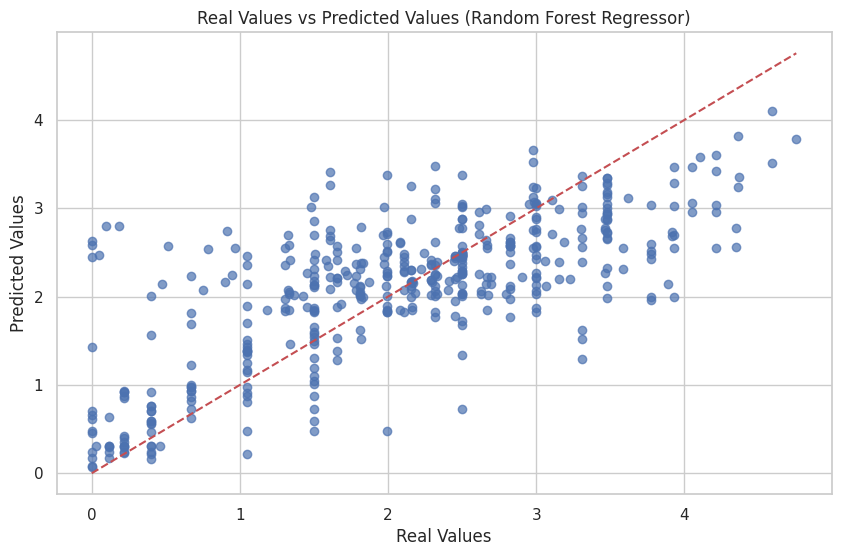

In [ ]:
# Plot real vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of identity
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real Values vs Predicted Values (Random Forest Regressor)')
plt.show()


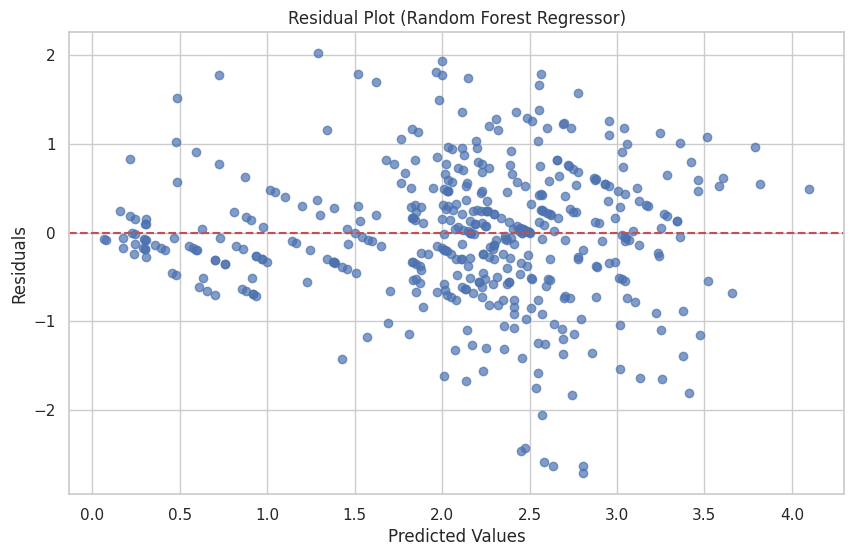

In [ ]:
# Calculate residuals
residuals = y_test - y_pred  # y_test are the actual values, y_pred are the predictions on the test set

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest Regressor)')
plt.show()


# GradientBoostingRegressor:

In [ ]:
# Define the model
model = GradientBoostingRegressor(random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting the model with the training data
grid_search.fit(X_train_scaled, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print(f'Best hyperparameters: {best_params}')

# Training the final model with the best hyperparameters
best_model = grid_search.best_estimator_

# Define the number of Stratified K-fold splits
k = 10  # For StratifiedKFold cross-validation

# Create bins for stratification (for regression tasks)
num_bins = np.floor(1 + np.log2(len(y_train))).astype(int)  # Sturges' rule to define number of bins
y_binned = np.digitize(y_train, bins=np.histogram_bin_edges(y_train, bins=num_bins))

# Define StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Apply StratifiedKFold cross-validation on the best model
cv_results = cross_validate(best_model, X_train_scaled, y_train, cv=skf.split(X_train_scaled, y_binned),
                            scoring=scoring, return_train_score=False)

# Print cross-validation results
print(f"\nCross-validation results (using {k}-folds with StratifiedKFold):")
print(f"Mean Squared Error (MSE): {cv_results['test_mse'].mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_results['test_rmse'].mean()}")
print(f"Mean Absolute Error (MAE): {cv_results['test_mae'].mean()}")
print(f"R² Score: {cv_results['test_r2'].mean()}")

# Now, evaluating the final model on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculating evaluation metrics on test data
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nEvaluation on the test data:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')



Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators

/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared


Cross-validation results (using 10-folds with StratifiedKFold):
Mean Squared Error (MSE): 0.497480033097302
Root Mean Squared Error (RMSE): 0.7047603293787328
Mean Absolute Error (MAE): 0.5811269964392938
R² Score: 0.25254473446214565

Evaluation on the test data:
Mean Squared Error (MSE): 0.5400021249456595
Root Mean Squared Error (RMSE): 0.7348483686759191
Mean Absolute Error (MAE): 0.6018337325035176
R² Score: 0.2599238271728841


/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Best hyperparameters
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

Melhores hiperparâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


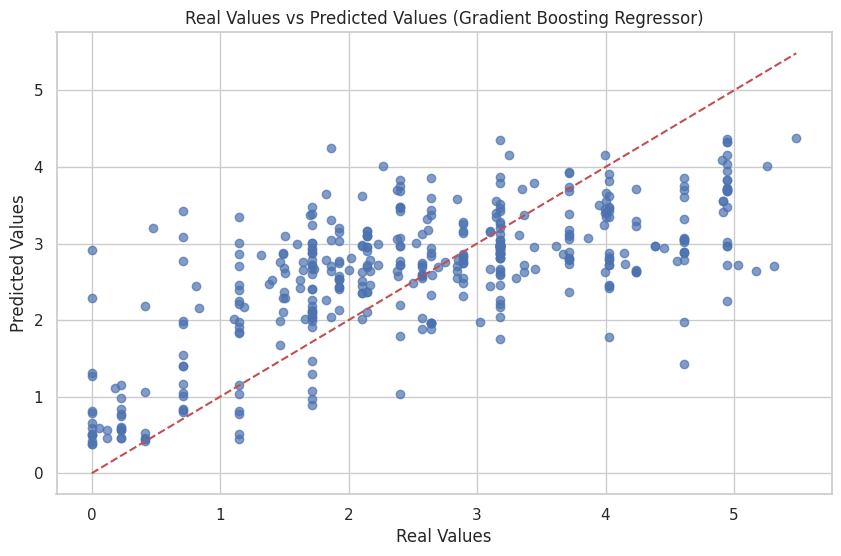

In [ ]:
# Plot real vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of identity
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real Values vs Predicted Values (Gradient Boosting Regressor)')
plt.show()


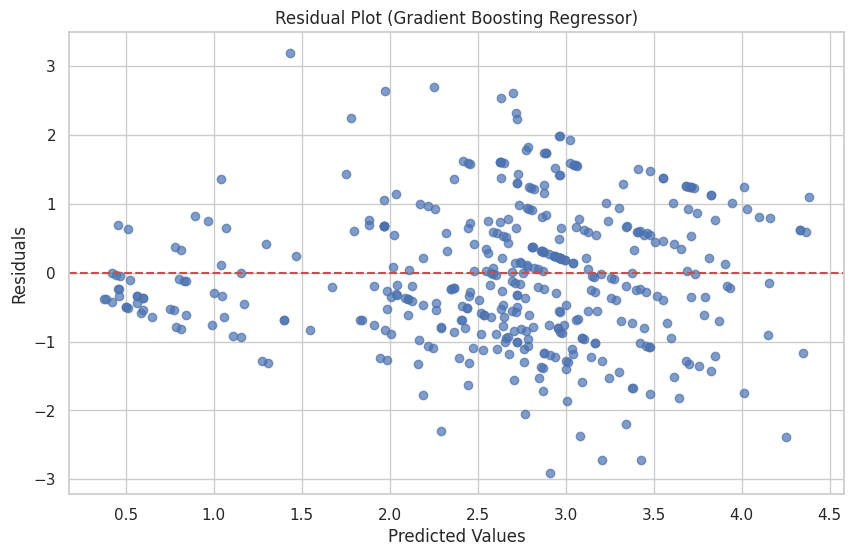

In [ ]:
# Calculate residuals
residuals = y_test - y_pred  # y_test are the actual values, y_pred are the predictions on the test set

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Gradient Boosting Regressor)')
plt.show()

# Supper Vector Regression:

In [ ]:
# Define the parameter grid for SVR
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'epsilon': [0.1, 0.2, 0.5, 1]
}

# Create a GridSearchCV object with SVR
grid = GridSearchCV(SVR(kernel='rbf'), param_grid, refit=True, verbose=2, scoring='neg_mean_squared_error', cv=5)

# Fit the model with the training data
grid.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print(f'Best hyperparameters: {grid.best_params_}')

# Get the best model from GridSearchCV
best_model = grid.best_estimator_

# Define the number of Stratified K-fold splits
k = 10  # For StratifiedKFold cross-validation

# Create bins for stratification (for regression tasks)
num_bins = np.floor(1 + np.log2(len(y_train))).astype(int)  # Sturges' rule to define number of bins
y_binned = np.digitize(y_train, bins=np.histogram_bin_edges(y_train, bins=num_bins))

# Define StratifiedKFold cross-validation
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'mse': make_scorer(mean_squared_error),
    'rmse': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'mae': make_scorer(mean_absolute_error),
    'r2': make_scorer(r2_score)
}

# Apply StratifiedKFold cross-validation on the best model
cv_results = cross_validate(best_model, X_train_scaled, y_train, cv=skf.split(X_train_scaled, y_binned),
                            scoring=scoring, return_train_score=False)

# Print cross-validation results
print(f"\nCross-validation results (using {k}-folds with StratifiedKFold):")
print(f"Mean Squared Error (MSE): {cv_results['test_mse'].mean()}")
print(f"Root Mean Squared Error (RMSE): {cv_results['test_rmse'].mean()}")
print(f"Mean Absolute Error (MAE): {cv_results['test_mae'].mean()}")
print(f"R² Score: {cv_results['test_r2'].mean()}")

# Now, evaluating the final model on the test set
y_pred = best_model.predict(X_test_scaled)

# Calculating evaluation metrics on test data
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'\nEvaluation on the test data:')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R² Score: {r2}')


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ........................C=0.1, epsilon=0.1, gamma=1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END ......................C=0.1, epsilon=0.1, gamma=0.1; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.1, gamma=0.01; total time=   0.0s
[CV] END .....................C=0.1, epsilon=0.

/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared


Cross-validation results (using 10-folds with StratifiedKFold):
Mean Squared Error (MSE): 0.48957836192793974
Root Mean Squared Error (RMSE): 0.6988818911846966
Mean Absolute Error (MAE): 0.5649385334801138
R² Score: 0.2650696050021951

Evaluation on the test data:
Mean Squared Error (MSE): 0.5126840138404517
Root Mean Squared Error (RMSE): 0.7160195624705038
Mean Absolute Error (MAE): 0.5660564412057933
R² Score: 0.29736346339217234


/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in versio

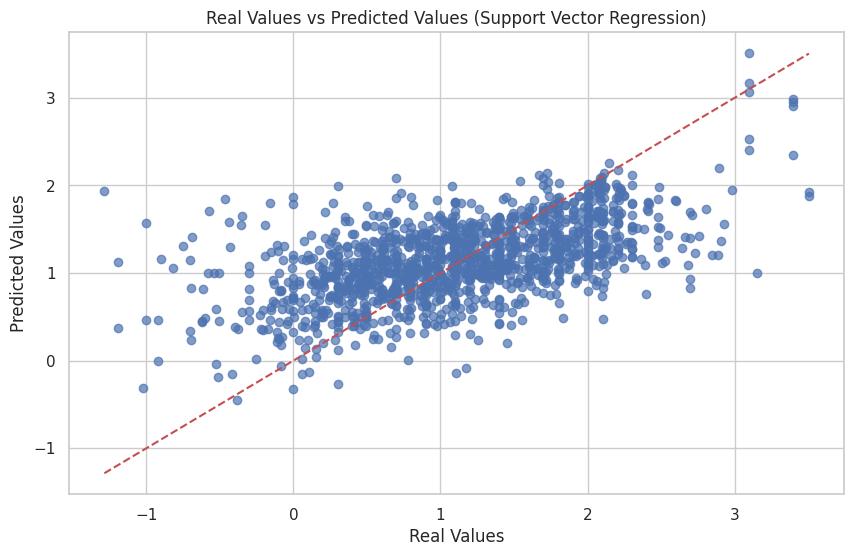

In [ ]:
# Plot real vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of identity
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real Values vs Predicted Values (Support Vector Regression)')
plt.show()

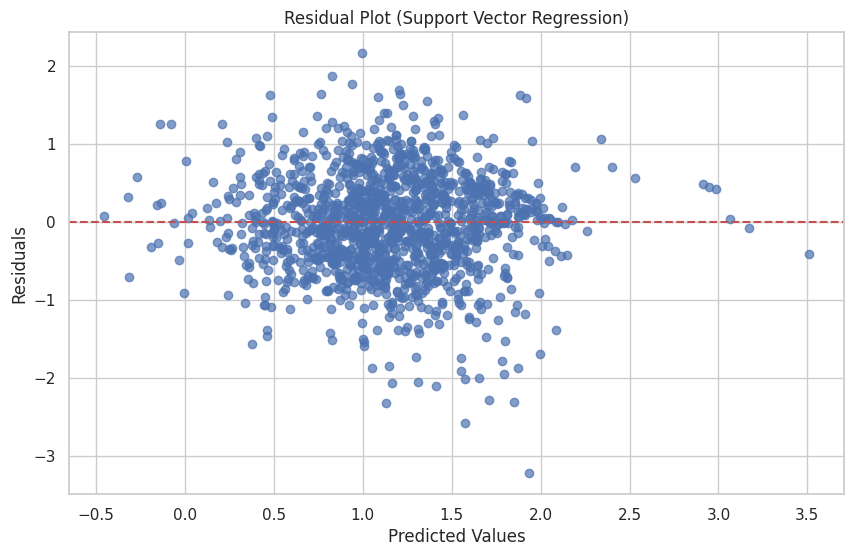

In [ ]:
# Calculate residuals
residuals = y_test - y_pred  # y_test are the actual values, y_pred are the predictions on the test set

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Support Vector Regression)')
plt.show()

# Neural Network

In [ ]:

model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2)


/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-03 16:14:30.787297: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.5210 - val_loss: 1.0083
Epoch 2/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9424 - val_loss: 0.9654
Epoch 3/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9162 - val_loss: 0.9360
Epoch 4/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7844 - val_loss: 0.8331
Epoch 5/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7012 - val_loss: 0.8314
Epoch 6/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6021 - val_loss: 0.8170
Epoch 7/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5258 - val_loss: 0.7812
Epoch 8/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5602 - val_loss: 0.7988
Epoch 9/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4862 - val_loss: 0.7575
Epoch 10/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4365 - val_loss: 0.7885
Epoch 11/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4031 - val_loss: 0.7725
Epoch 12/200
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.

In [ ]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │         6,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,461 (201.02 KB)

 Trainable params: 17,153 (67.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 34,308 (134.02 KB)

In [ ]:
y_pred = model.predict(X_test_scaled)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')
print(f'RMSE: {rmse}')

MSE: 0.8044532405860144
MAE: 0.5976621599476216
R²: 0.10847651880317222
RMSE: 0.8969131733819135


/home/alisboa/miniforge3/envs/tese/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


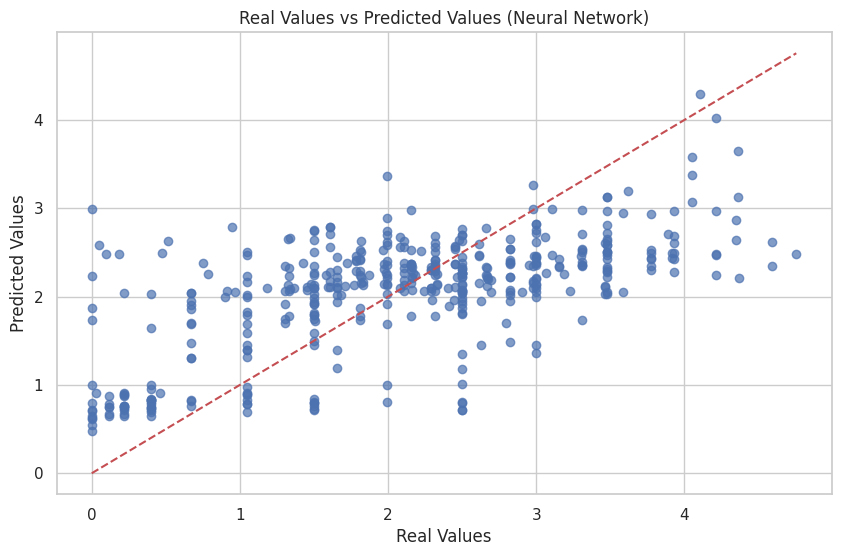

In [ ]:
# Plot real vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of identity
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Real Values vs Predicted Values (Neural Network)')
plt.show()

In [ ]:
#Transforms to 1D vector
y_pred = y_pred.ravel()

# Alternatively:
#y_pred = y_pred.reshape(-1)

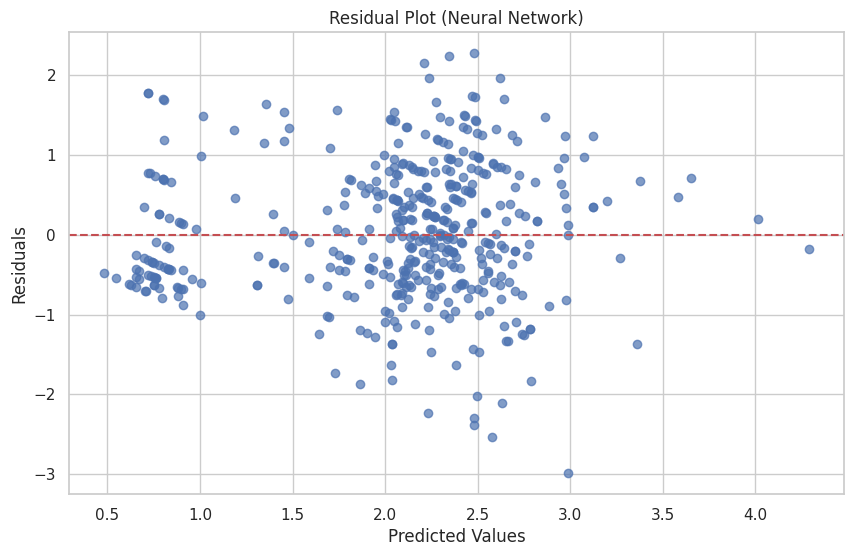

In [ ]:
# Calculate residuals
residuals = y_test - y_pred  # y_test are the actual values, y_pred are the predictions on the test set

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Neural Network)')
plt.show()

In [ ]:
valores_unicos_gram = data['multiresistant'].unique()
print("Valores únicos na coluna 'multiresistant':", valores_unicos_gram)

Valores únicos na coluna 'multiresistant': [0 1]


In [ ]:
y_pred = y_pred.flatten()  # Converts it to 1D


In [ ]:
residuals = y_test - y_pred  # y_test are the actual values, y_pred are the predictions on the test set

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='b')
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Analysing the article's dataset:

In [ ]:
mic=pd.read_csv("/content/mic_data.csv")

In [ ]:
mic

,Unnamed: 0,sequence,value
0,0,AAAAAAAAAAGIGKFLHSAKKFGKAFVGEIMNS,2.099950
1,1,AAAAAAAIKMLMDLVNERIMALNKKAKK,1.000000
2,2,AAAKAALNAVLVGANA,1.903090
3,3,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC,0.250463
4,4,AAGMGFFGAR,1.108874
...,...,...,...
4541,4541,YVLWKRKRWIFI,1.778151
4542,4542,YVPLPNVPQPGRRPFPTFPGQGPFNPKIKWPQGY,0.548456
4543,4543,YVPPVQKPHPNGPKFPTFP,1.364542
4544,4544,YWKKWKKLRRIFMLV,-0.020287


In [ ]:
# Obter previsões do modelo
y_pred = model.predict(X_test).flatten()

# Converter y_test para ndarray e garantir que seja 1-dimensional
y_test = y_test.values.ravel()

# Calcular resíduos
residuos = y_test - y_pred


Vizualizar residuos:

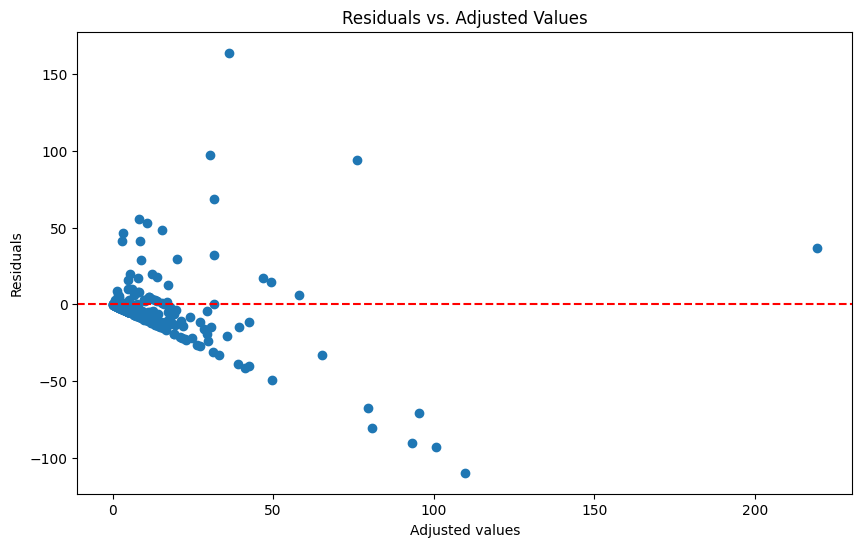

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Adjusted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Adjusted Values')
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()


NameError: name 'residuos' is not defined

<Figure size 1000x600 with 0 Axes>

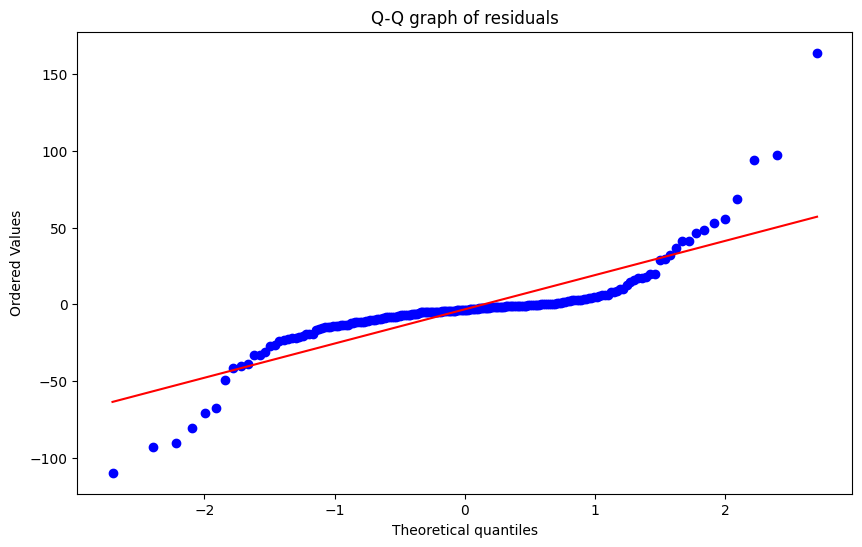

In [ ]:
plt.figure(figsize=(10, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title('Q-Q graph of residuals')
plt.show()


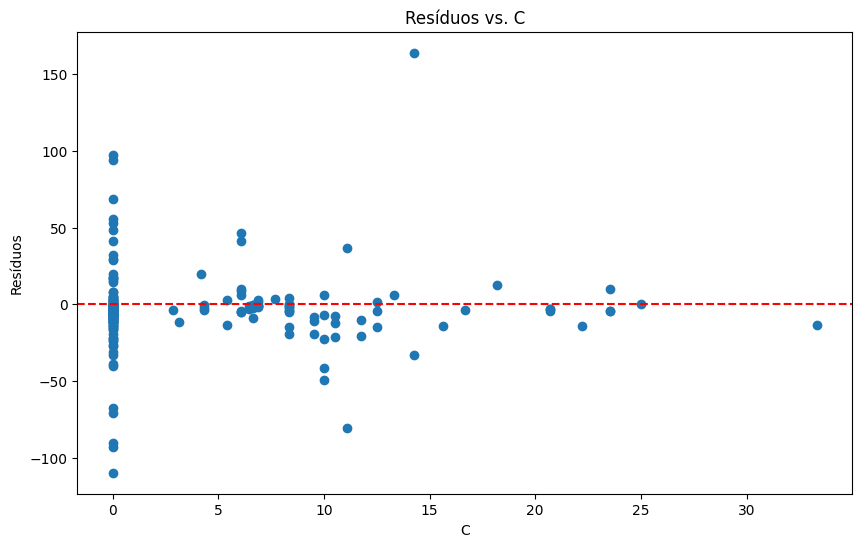

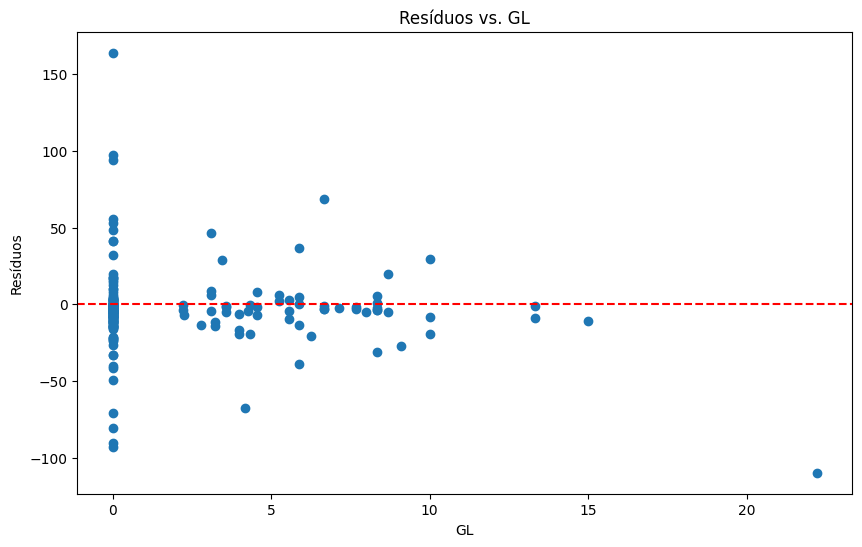

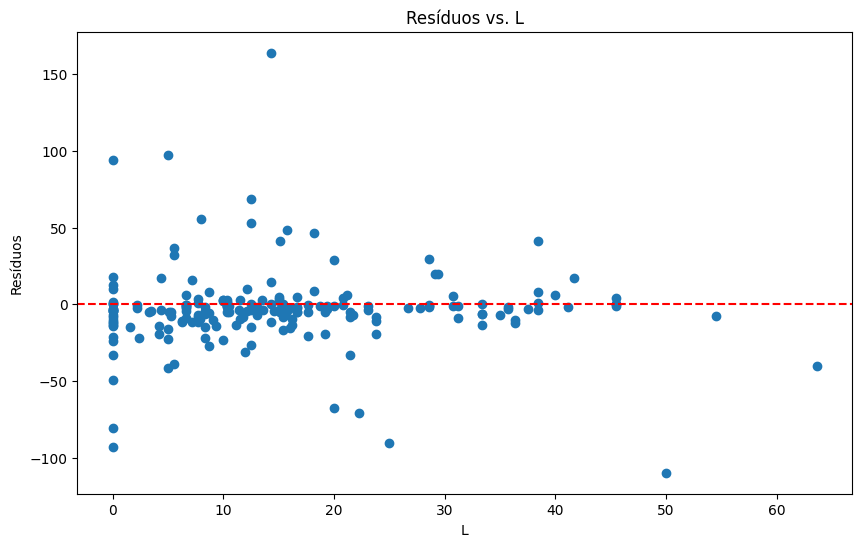

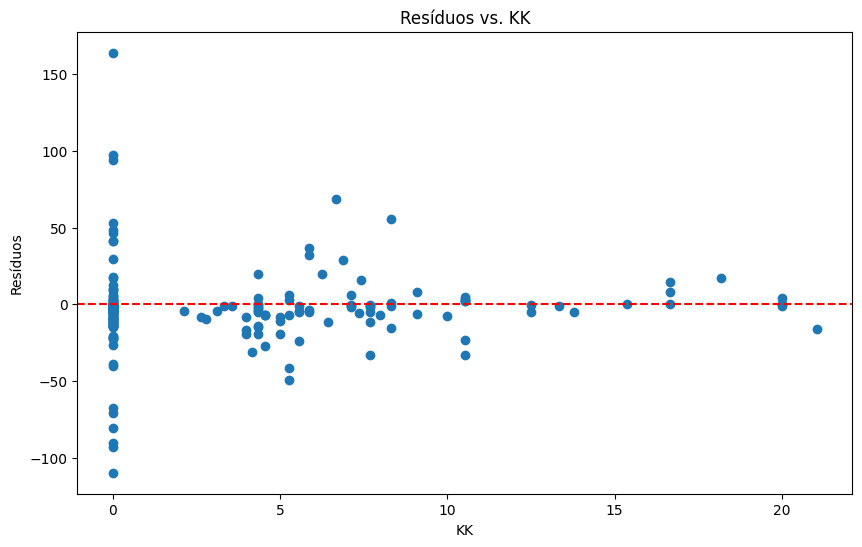

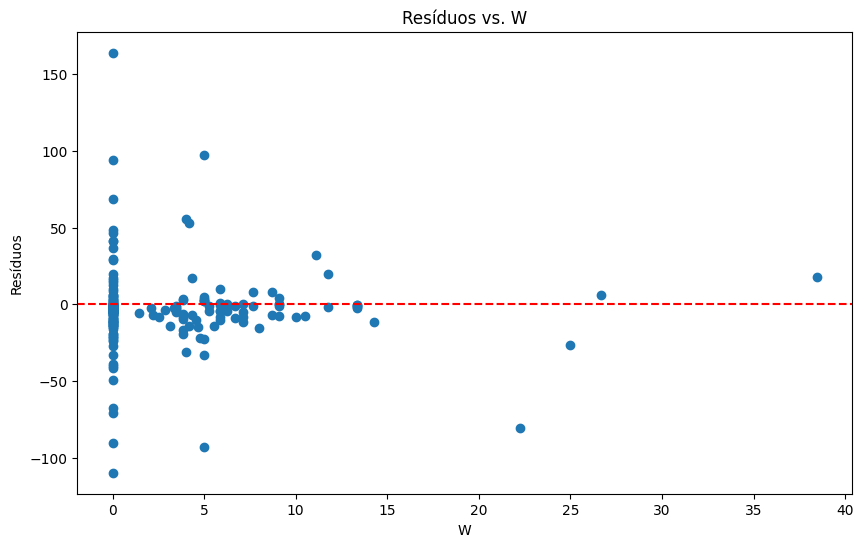

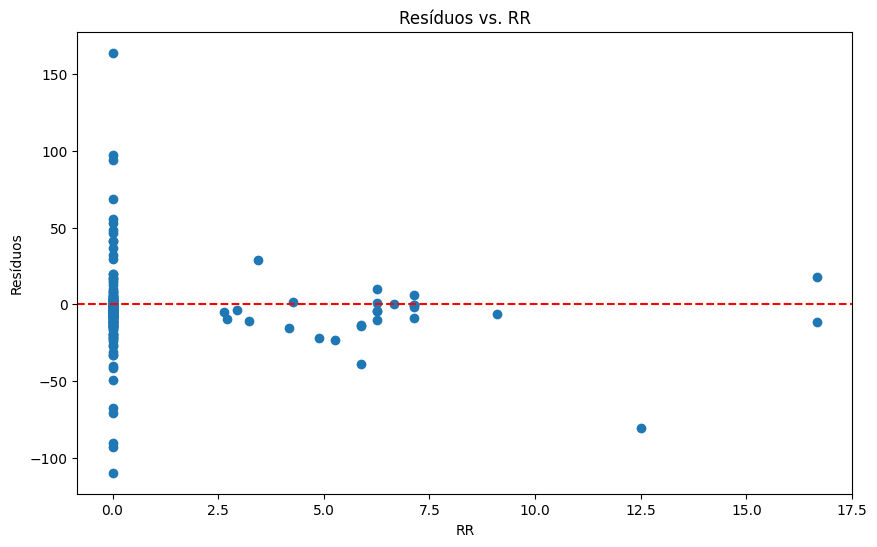

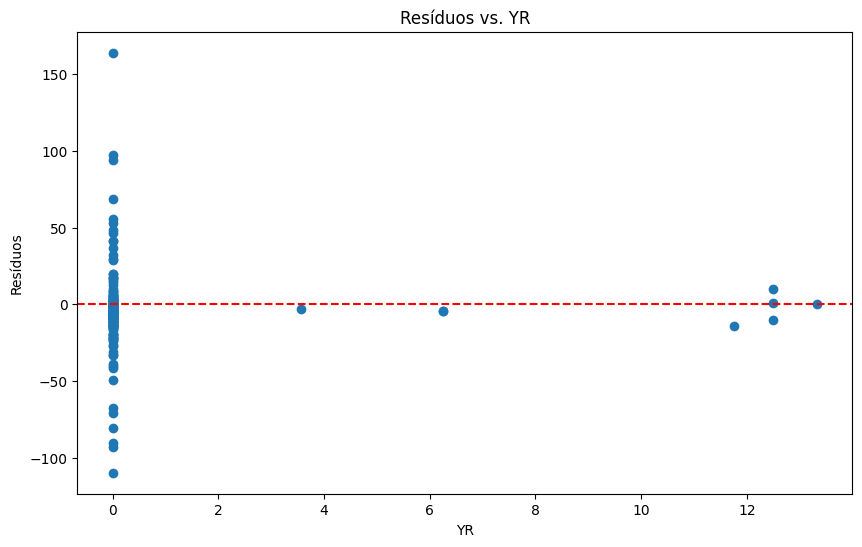

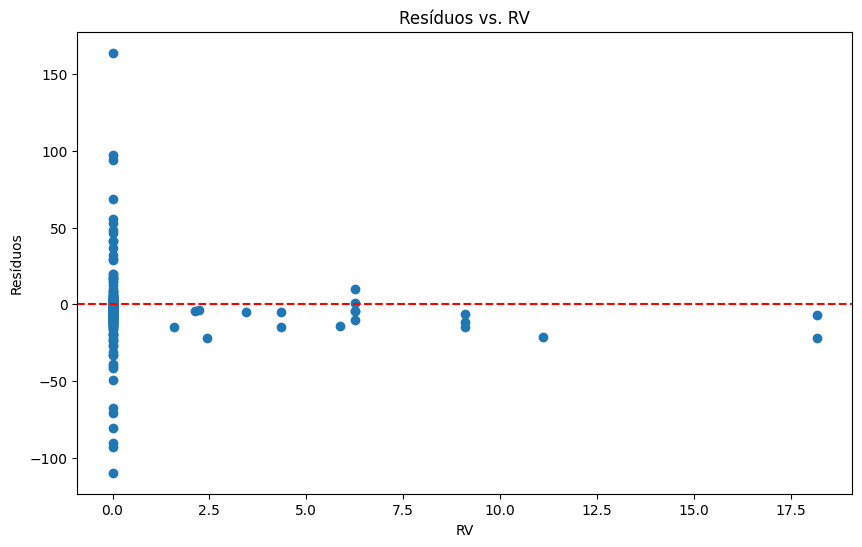

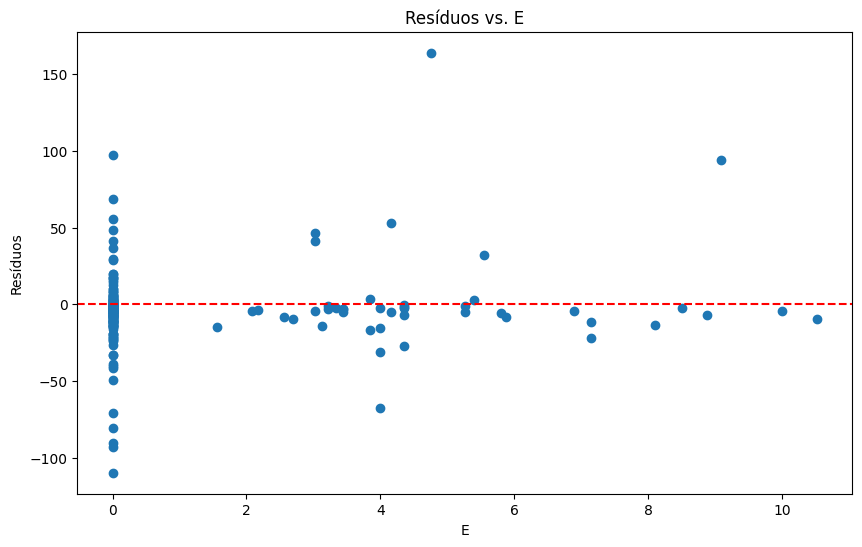

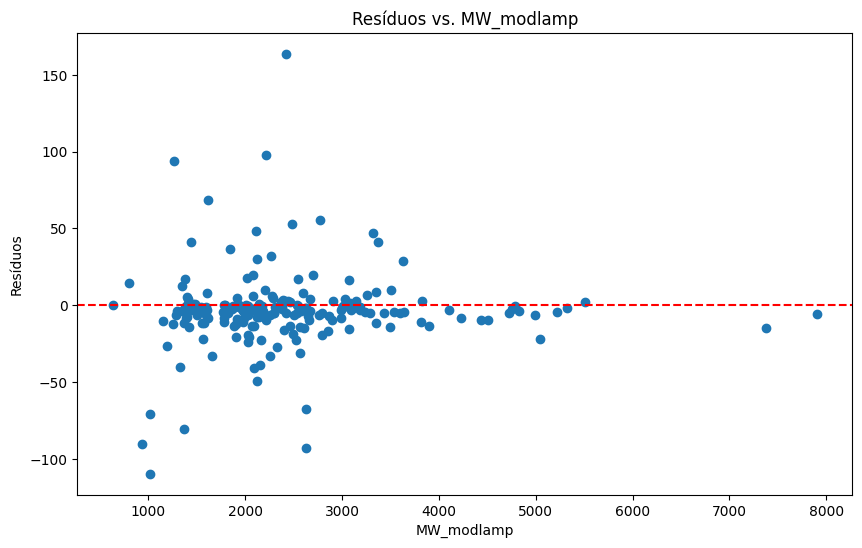

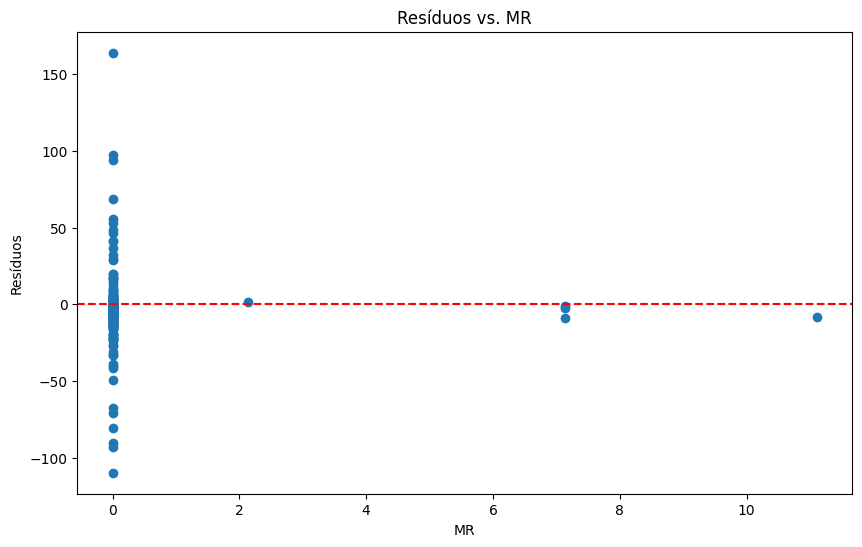

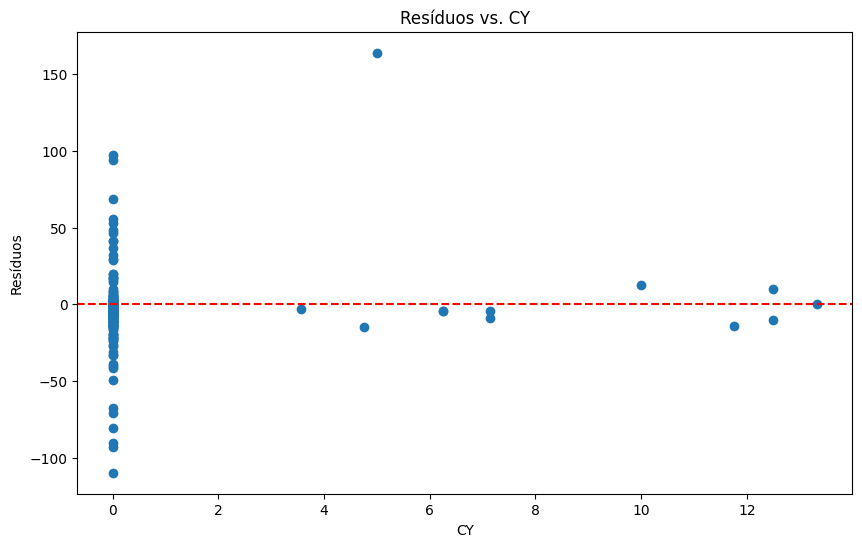

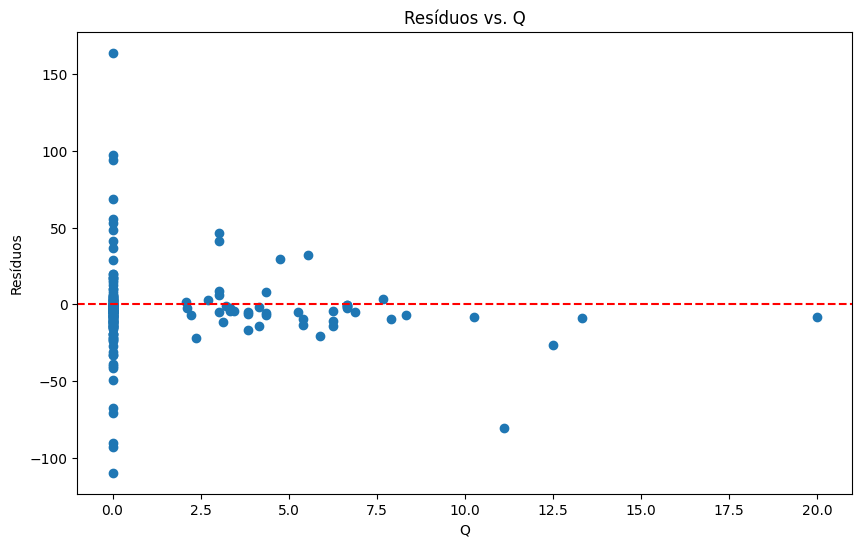

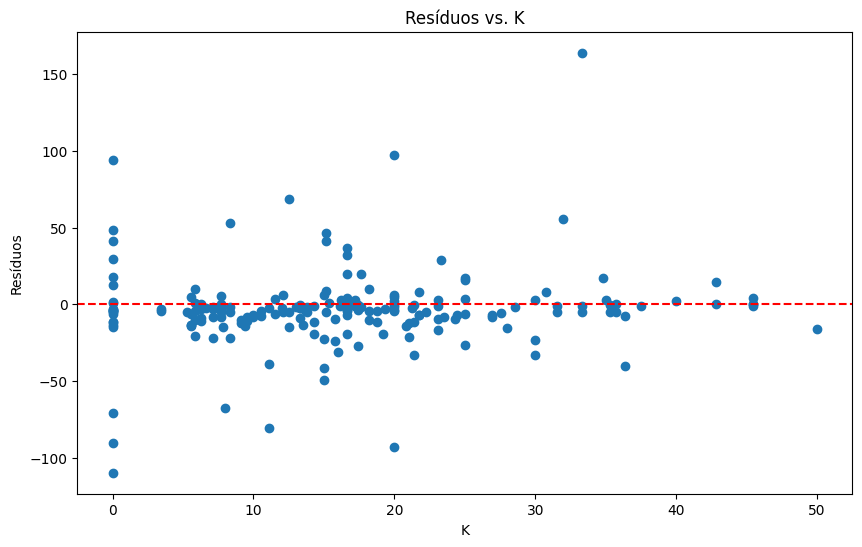

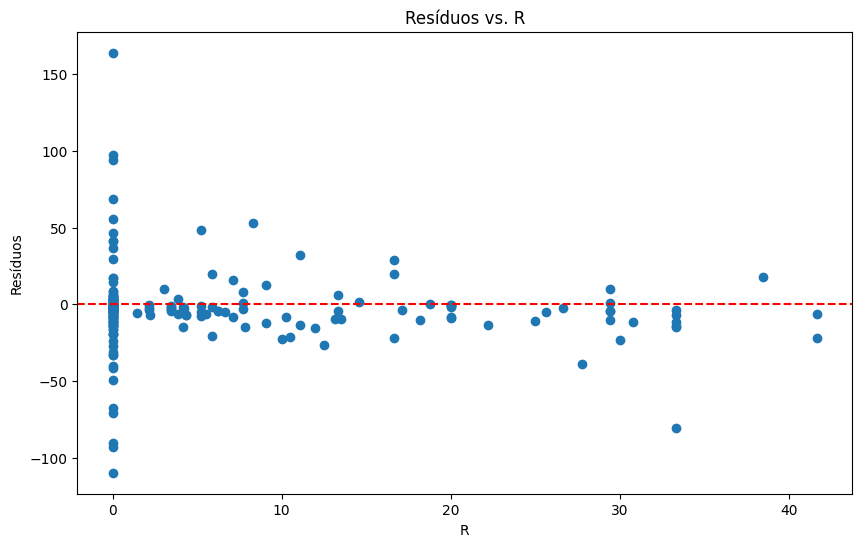

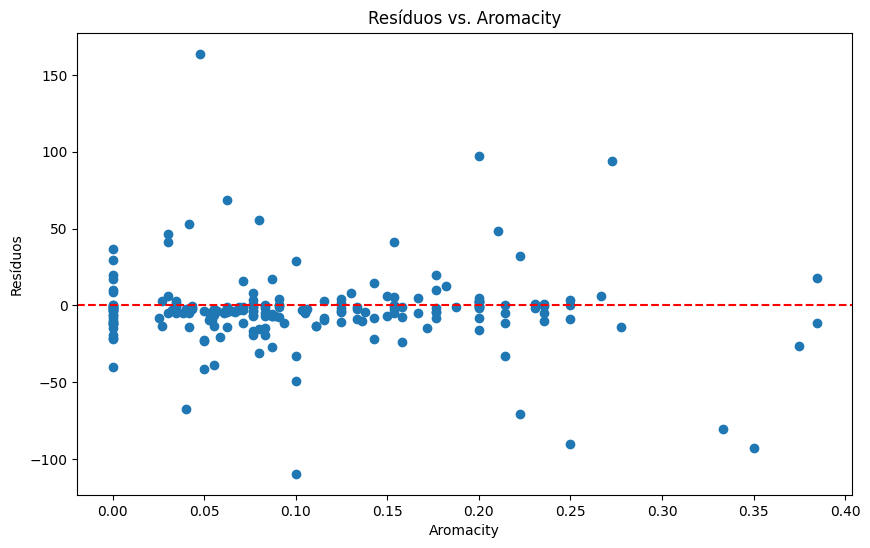

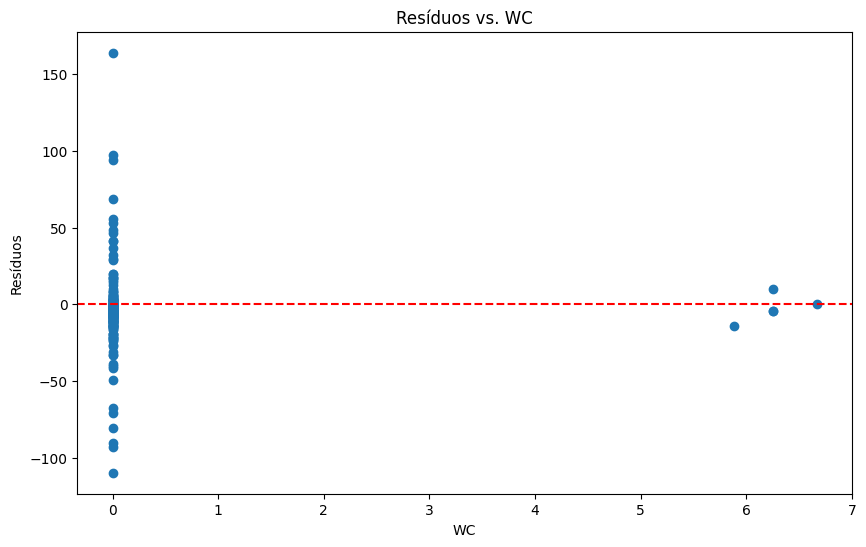

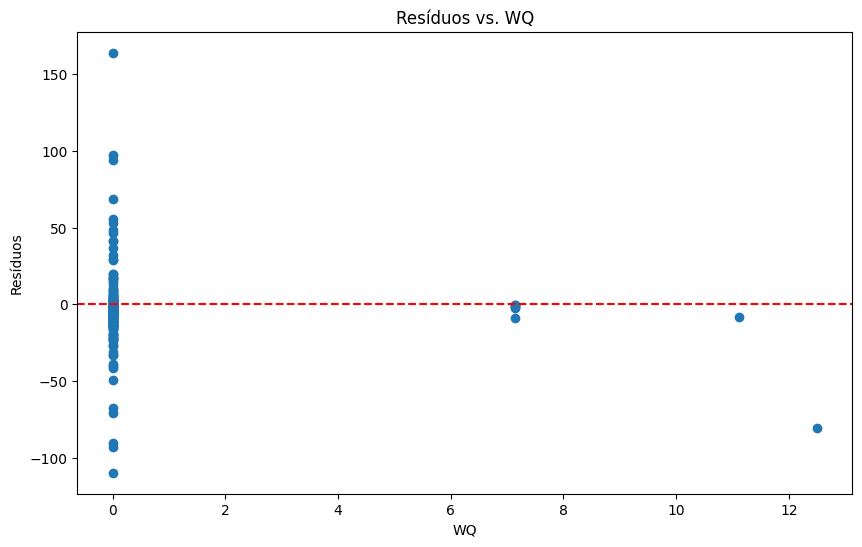

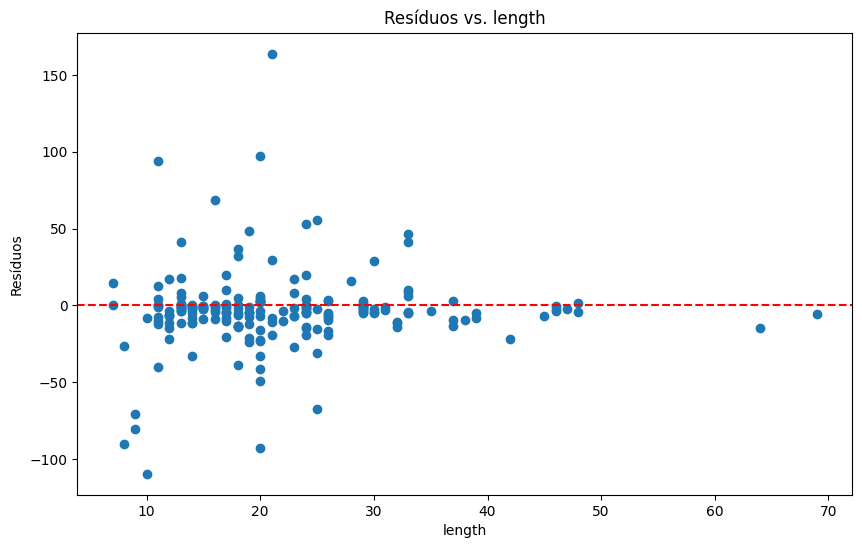

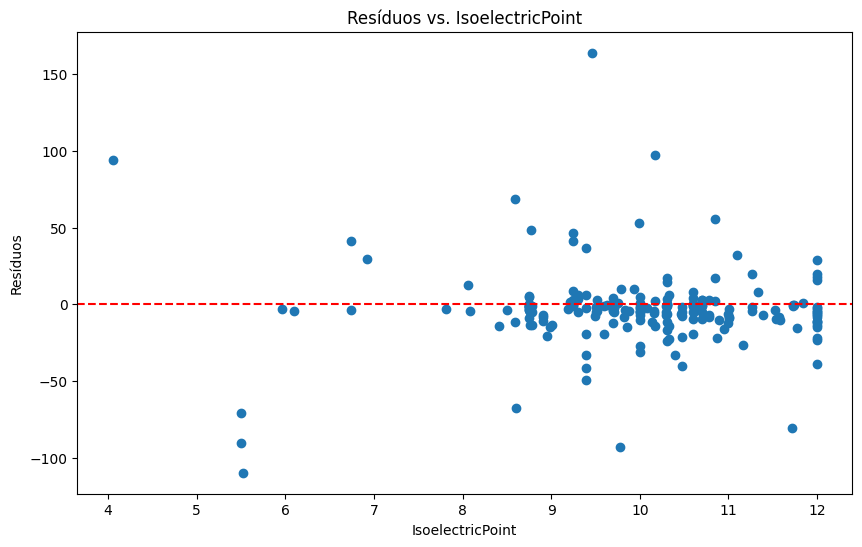

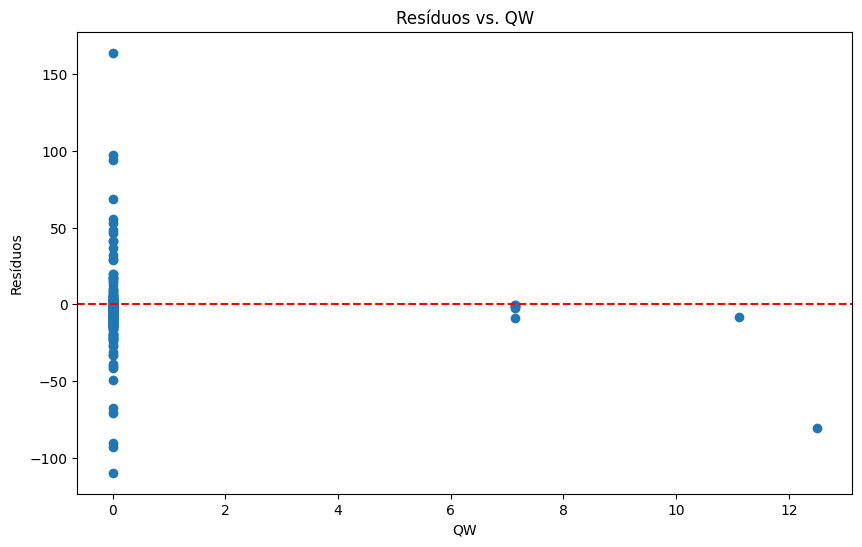

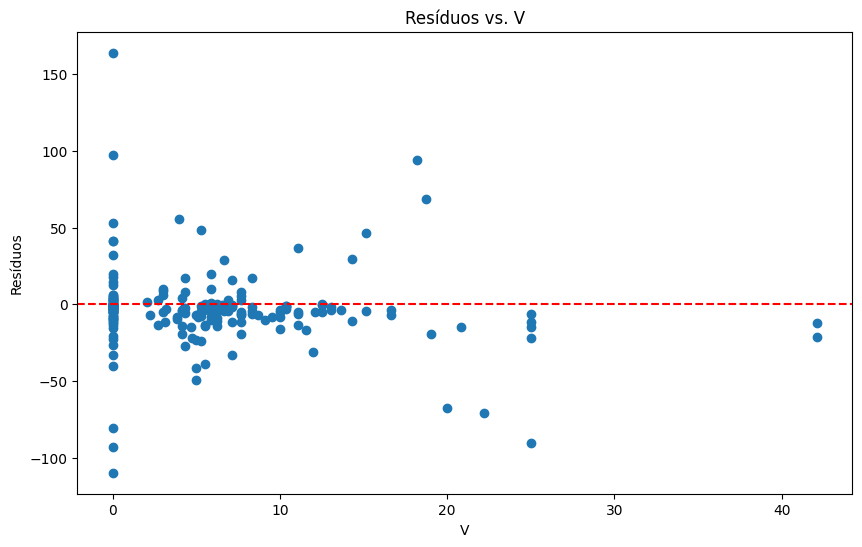

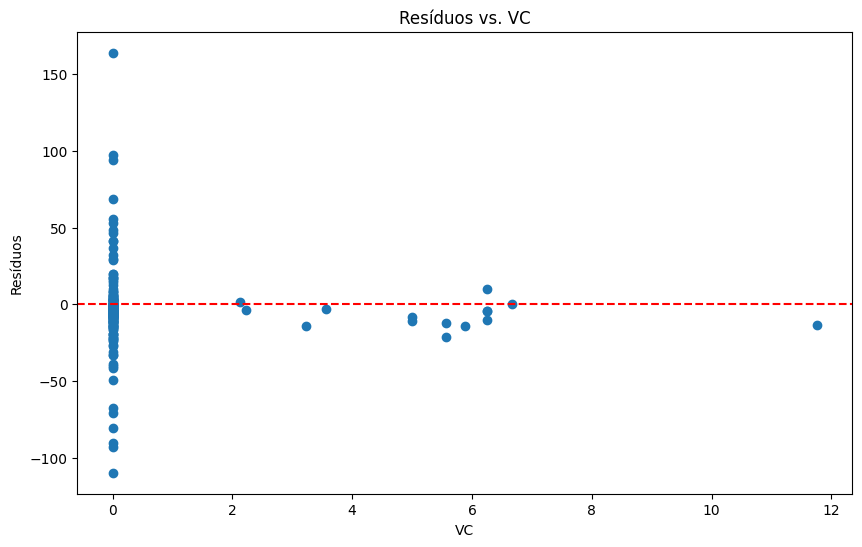

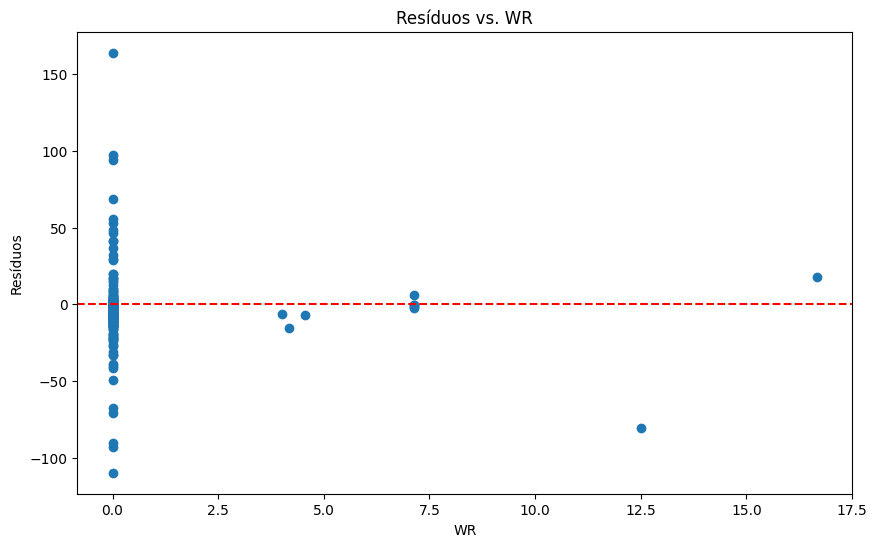

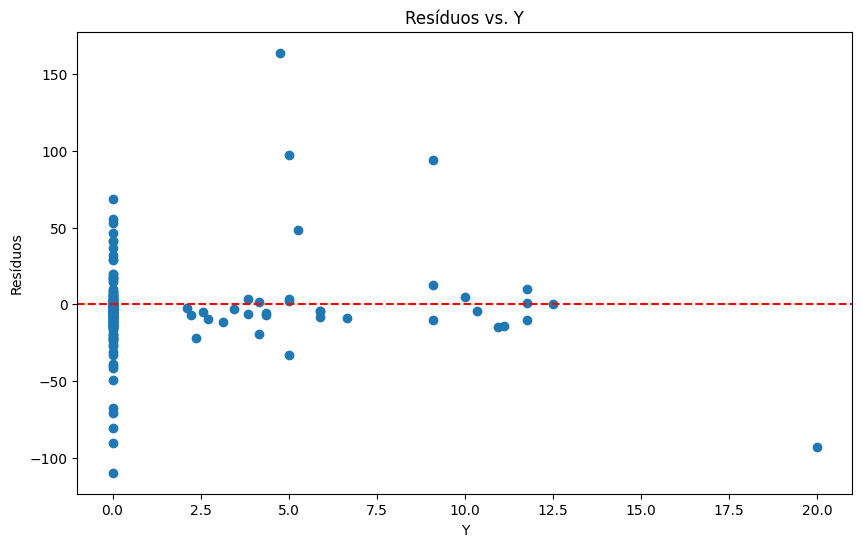

In [ ]:
X_test_df = pd.DataFrame(X_test)
for col in X_test_df.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_df[col], residuos)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(col)
    plt.ylabel('Resíduos')
    plt.title(f'Resíduos vs. {col}')
    plt.show()


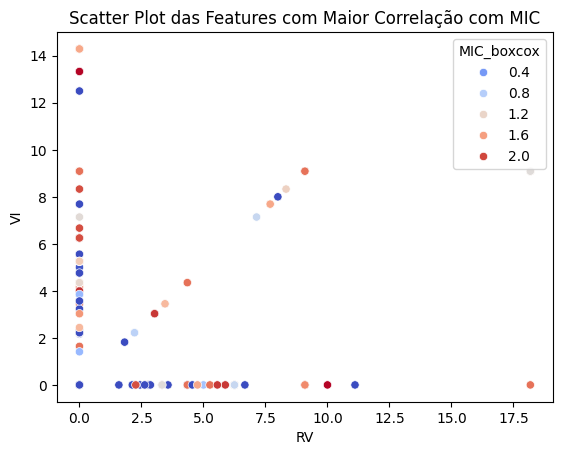

In [ ]:
# MIC Correlation
X = df.drop(columns=['MIC_boxcox',"MIC_padronizado"])
mic = df['MIC_boxcox']

df = pd.DataFrame(X)
df['MIC_boxcox'] = mic

correlation_matrix = df.corr()


top_features = correlation_matrix['MIC_boxcox'].sort_values(ascending=False).head(6).index


sns.scatterplot(x=df[top_features[1]], y=df[top_features[2]], hue=df['MIC_boxcox'], palette='coolwarm')


plt.title('Scatter Plot das Features com Maior Correlação com MIC')
plt.xlabel(top_features[1])
plt.ylabel(top_features[2])
plt.show()


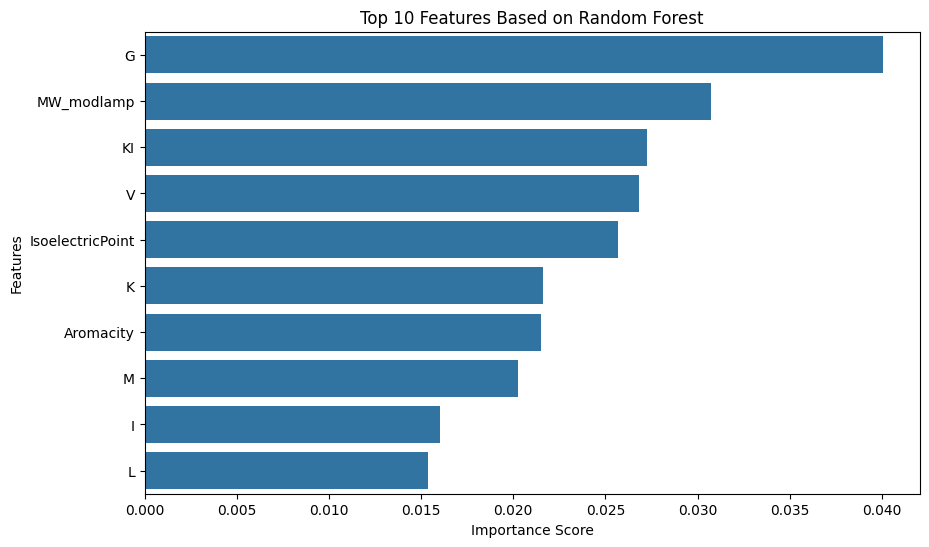

In [ ]:
# Fit RandomForest to get feature importances
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance and select the top 10
top_10_rf = feature_importances.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_rf)
plt.title('Top 10 Features Based on Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()



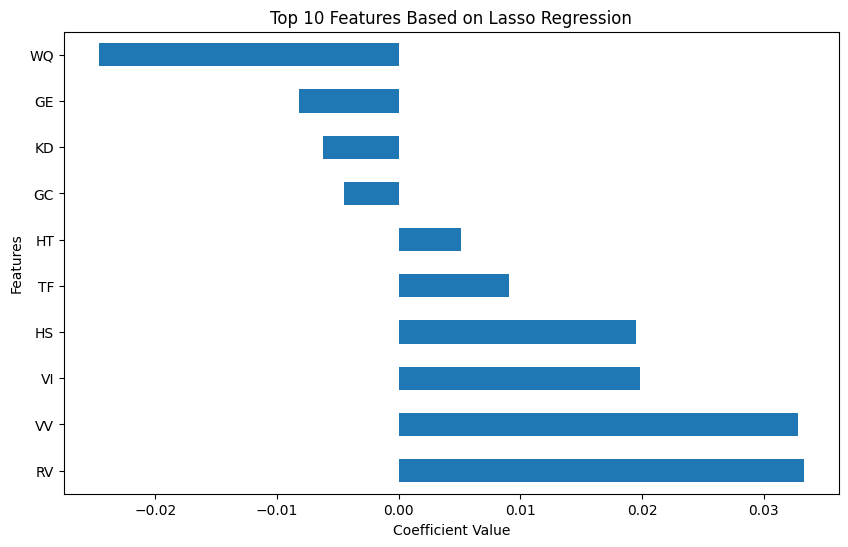

In [ ]:
# Use Lasso for feature selection
lasso = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
lasso.fit(X, y)

# Get coefficients
lasso_coefficients = pd.Series(lasso.named_steps['lasso'].coef_, index=X.columns)
lasso_importance = lasso_coefficients[lasso_coefficients != 0].sort_values(ascending=False)

# Select the top 10 features
top_10_lasso = lasso_importance.head(10)

# Plot Lasso coefficients for the top 10 features
plt.figure(figsize=(10, 6))
top_10_lasso.plot(kind='barh')
plt.title('Top 10 Features Based on Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()



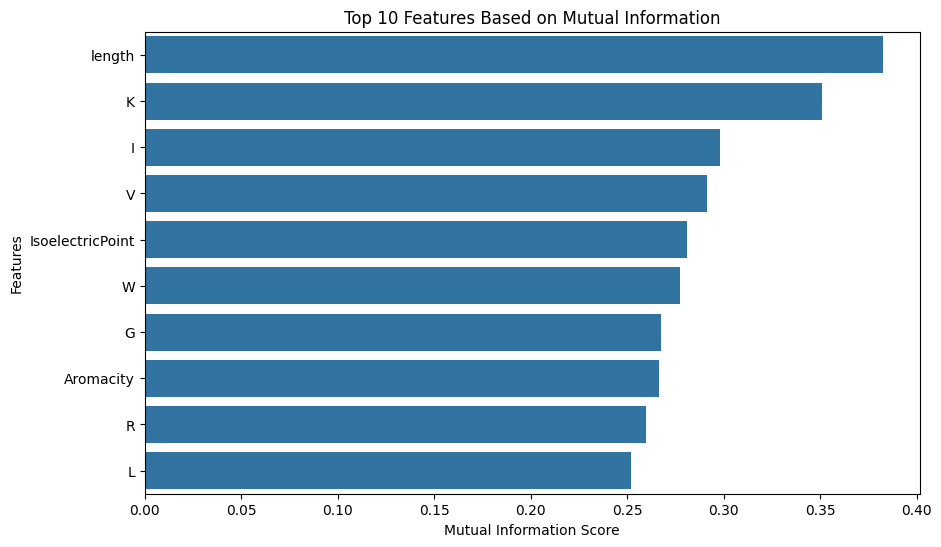

In [ ]:
# Calculate Mutual Information
X = df.drop(columns=['MIC_boxcox', 'MIC_padronizado'])  # Remove the target columns
y = df['MIC_boxcox']
mi = mutual_info_regression(X, y)

# Create DataFrame for Mutual Information
mi_feature_importance = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_feature_importance = mi_feature_importance.sort_values(by='Mutual Information', ascending=False)

# Select the top 10 features
top_10_mi = mi_feature_importance.head(10)

# Plot Mutual Information scores for the top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Mutual Information', y='Feature', data=top_10_mi)
plt.title('Top 10 Features Based on Mutual Information')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()




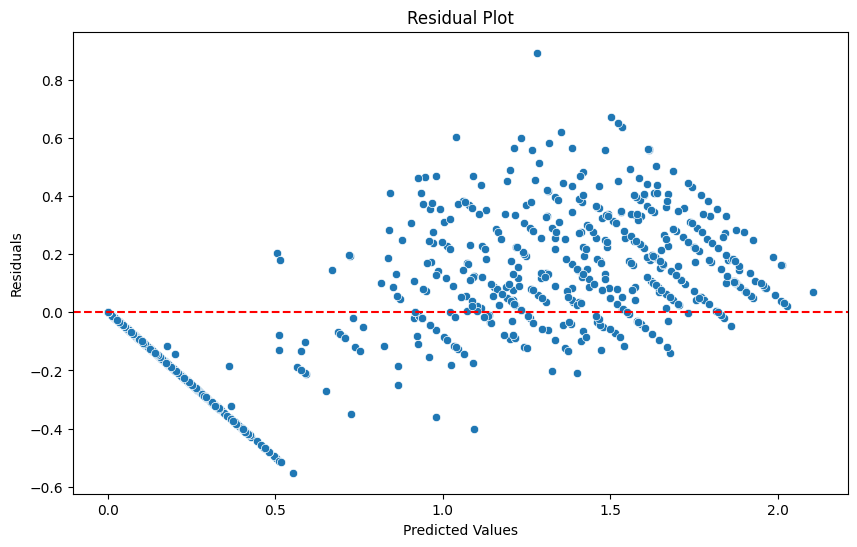

In [ ]:
# Fit a model (e.g., Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
